# Analyzing Healthcare Provider Shortage - Part 3/3

The big question that we would like to answer with this analysis is: `What are the socieconomic and demographic factors that influence access to mental healthcare providers?`

In this section, will try to answer the question by:

 - Identifying which factors are most predictive of provider count
 - Identifying the influence these factors have on provider count
 - Identifying whether the influence is positive or negative
    
The analysis will be performed on data for all counties in the U.S. that have mental healthcare providers.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyzing-Healthcare-Provider-Shortage---Part-3/3" data-toc-modified-id="Analyzing-Healthcare-Provider-Shortage---Part-3/3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyzing Healthcare Provider Shortage - Part 3/3</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Create-a-GIS-Connection" data-toc-modified-id="Import-Libraries-and-Create-a-GIS-Connection-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Import Libraries and Create a GIS Connection</a></span></li></ul></li></ul></li><li><span><a href="#Understand-Mental-Healthcare-Providers-Shortage" data-toc-modified-id="Understand-Mental-Healthcare-Providers-Shortage-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Understand Mental Healthcare Providers Shortage</a></span><ul class="toc-item"><li><span><a href="#Gather-and-Process-Data" data-toc-modified-id="Gather-and-Process-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gather and Process Data</a></span><ul class="toc-item"><li><span><a href="#Create-County-Dataframe-from-Demographics-Data" data-toc-modified-id="Create-County-Dataframe-from-Demographics-Data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Create County Dataframe from Demographics Data</a></span></li><li><span><a href="#Create-County-Dataframe-from-Expenditure-Data" data-toc-modified-id="Create-County-Dataframe-from-Expenditure-Data-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Create County Dataframe from Expenditure Data</a></span></li><li><span><a href="#Spatially-Join-Demographic-and-Health-Expenditure-Data" data-toc-modified-id="Spatially-Join-Demographic-and-Health-Expenditure-Data-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Spatially Join Demographic and Health Expenditure Data</a></span><ul class="toc-item"><li><span><a href="#Check-Merge-Results" data-toc-modified-id="Check-Merge-Results-2.1.3.1"><span class="toc-item-num">2.1.3.1&nbsp;&nbsp;</span>Check Merge Results</a></span></li></ul></li><li><span><a href="#Get-Provider-Count---Aggregate-Data" data-toc-modified-id="Get-Provider-Count---Aggregate-Data-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Get Provider Count - Aggregate Data</a></span></li><li><span><a href="#Get-Aggregated-Data-Layer" data-toc-modified-id="Get-Aggregated-Data-Layer-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Get Aggregated Data Layer</a></span><ul class="toc-item"><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2.1.5.1"><span class="toc-item-num">2.1.5.1&nbsp;&nbsp;</span>Clean Data</a></span></li><li><span><a href="#Plot-Spatially-Enabled-Data" data-toc-modified-id="Plot-Spatially-Enabled-Data-2.1.5.2"><span class="toc-item-num">2.1.5.2&nbsp;&nbsp;</span>Plot Spatially Enabled Data</a></span></li></ul></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Plot Data</a></span><ul class="toc-item"><li><span><a href="#Pair-Plot" data-toc-modified-id="Pair-Plot-2.1.6.1"><span class="toc-item-num">2.1.6.1&nbsp;&nbsp;</span>Pair Plot</a></span></li><li><span><a href="#Correlation-Plot" data-toc-modified-id="Correlation-Plot-2.1.6.2"><span class="toc-item-num">2.1.6.2&nbsp;&nbsp;</span>Correlation Plot</a></span></li></ul></li></ul></li><li><span><a href="#Generate-a-Global-Model" data-toc-modified-id="Generate-a-Global-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Generate a Global Model</a></span><ul class="toc-item"><li><span><a href="#Create-a-Base-Model" data-toc-modified-id="Create-a-Base-Model-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Create a Base Model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-Model-using-Stats-Models" data-toc-modified-id="Linear-Regression-Model-using-Stats-Models-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Linear Regression Model using Stats Models</a></span></li><li><span><a href="#Verify-Assumptions" data-toc-modified-id="Verify-Assumptions-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>Verify Assumptions</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-2.2.1.3"><span class="toc-item-num">2.2.1.3&nbsp;&nbsp;</span>Outlier Detection</a></span></li><li><span><a href="#Remove-Outliers" data-toc-modified-id="Remove-Outliers-2.2.1.4"><span class="toc-item-num">2.2.1.4&nbsp;&nbsp;</span>Remove Outliers</a></span></li></ul></li><li><span><a href="#Feature-Selection-and-Importance" data-toc-modified-id="Feature-Selection-and-Importance-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Feature Selection and Importance</a></span><ul class="toc-item"><li><span><a href="#Run-Feature-Selection-Algorithms" data-toc-modified-id="Run-Feature-Selection-Algorithms-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>Run Feature Selection Algorithms</a></span></li><li><span><a href="#Identify-Features-Using-Lasso" data-toc-modified-id="Identify-Features-Using-Lasso-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>Identify Features Using Lasso</a></span></li></ul></li><li><span><a href="#Regression-with-Selected-Features" data-toc-modified-id="Regression-with-Selected-Features-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Regression with Selected Features</a></span><ul class="toc-item"><li><span><a href="#Clean-the-Data" data-toc-modified-id="Clean-the-Data-2.2.3.1"><span class="toc-item-num">2.2.3.1&nbsp;&nbsp;</span>Clean the Data</a></span></li><li><span><a href="#Transform-Data" data-toc-modified-id="Transform-Data-2.2.3.2"><span class="toc-item-num">2.2.3.2&nbsp;&nbsp;</span>Transform Data</a></span></li><li><span><a href="#Run-Global-Model" data-toc-modified-id="Run-Global-Model-2.2.3.3"><span class="toc-item-num">2.2.3.3&nbsp;&nbsp;</span>Run Global Model</a></span></li><li><span><a href="#Verify-Assumptions" data-toc-modified-id="Verify-Assumptions-2.2.3.4"><span class="toc-item-num">2.2.3.4&nbsp;&nbsp;</span>Verify Assumptions</a></span></li></ul></li><li><span><a href="#GWR" data-toc-modified-id="GWR-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>GWR</a></span></li></ul></li><li><span><a href="#In-Progress---Random-Forest-and-Local-Bivariate-Relationships" data-toc-modified-id="In-Progress---Random-Forest-and-Local-Bivariate-Relationships-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>In Progress - Random Forest and Local Bivariate Relationships</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#RF" data-toc-modified-id="RF-2.3.0.1"><span class="toc-item-num">2.3.0.1&nbsp;&nbsp;</span>RF</a></span></li><li><span><a href="#LBR" data-toc-modified-id="LBR-2.3.0.2"><span class="toc-item-num">2.3.0.2&nbsp;&nbsp;</span>LBR</a></span></li><li><span><a href="#Import-from-featureclass" data-toc-modified-id="Import-from-featureclass-2.3.0.3"><span class="toc-item-num">2.3.0.3&nbsp;&nbsp;</span>Import from featureclass</a></span></li></ul></li></ul></li></ul></li></ul></div>

### Import Libraries and Create a GIS Connection

In [20]:
# Import Libraries
from IPython.display import display

# Import arcgis
import arcgis
from arcgis.gis import GIS
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

# Import libraries for data exploration
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

# Import plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for time
import time


In [21]:
# Create connection
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

# Understand Mental Healthcare Providers Shortage
<a name="mental-health"></a>

To understand shortage of mental healthcare providers we will try to identify socioeconomic and demographic factors that influence access to these providers. We will use Esri's Living Atlas data layers to access socioeconomic, demographic, health expenditure and combine it with provider data for this analysis.

## Gather and Process Data
<a name="gather-data"></a>

### Create County Dataframe from Demographics Data
<a name="demographic-data"></a>

In [4]:
# Search for Population data layer
popsearch_result = gis.content.search('title: 2018 USA Population Density')
popsearch_result

[<Item title:"2018 USA Population Density" type:Map Image Layer owner:esri_livingatlas>,
 <Item title:"2018 USA Tapestry Segmentation" type:Map Image Layer owner:esri_livingatlas>]

<Item title:"2018 USA Population Density" type:Map Image Layer owner:esri_livingatlas>
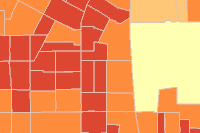

In [6]:
# Get Population Density
popdensity = popsearch_result[0]
popdensity

In [7]:
# Check first 5 layers in population Density
popdensity.layers[:5]

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/4">]

In [8]:
# Look at first few field names
county_layer = popdensity.layers[46]
print('FIELD NAME', '\t\t', 'FIELD ALIAS')
for field in county_layer.properties.fields[:10]:
    print(field['name'], '\t\t', field['alias'])

FIELD NAME 		 FIELD ALIAS
OBJECTID 		 OBJECTID
Shape 		 Shape
ID 		 ID
NAME 		 NAME
STATE_NAME 		 STATE_NAME
ST_ABBREV 		 ST_ABBREV
AREA 		 Area in Square Miles (Calculated)
TOTPOP_CY 		 2018 Total Population (Esri)
HHPOP_CY 		 2018 Household Population (Esri)
FAMPOP_CY 		 2018 Family Population (Esri)


In [9]:
# Get specific attributes for Counties
%time
# county_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/3e5f8ebe5a114a61b7f350e7a1203761/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/46")
county_layer = popdensity.layers[46]
county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    chunk_df = county_layer.query(out_fields=['Shape','ST_ABBREV','NAME','ASIAN_CY','AMERIND_CY','AVGHHSZ_CY','AVGHINC_CY','BLACK_CY','EDUCBASECY','HISPPOP_CY',
                          'MEDAGE_CY','MINORITYCY','OTHRACE_CY','PCI_CY','POPDENS_CY','UNEMPRT_CY','WHITE_CY','SMCOLL_CY',
                          'ASSCDEG_CY','BACHDEG_CY','GRADDEG_CY','TOTPOP_CY'],return_all_records=False,result_offset=offset,result_record_count=750,as_df=True)
#     county_df_test = county_featureset_test.sdf
#     if county_df.shape[0] == 0:
#         county_df = chunk_df
#     else:
    county_df = pd.concat([chunk_df, county_df], ignore_index=True)
    
    offset += 750

Wall time: 0 ns


In [10]:
county_df.shape

(3142, 23)

### Create County Dataframe from Expenditure Data
<a name="exp-data"></a>

In [11]:
# Search for Population data layer
expsearch_result = gis.content.search('title: 2018 USA Health Insurance Spending')
expsearch_result

[<Item title:"2018 USA Health Insurance Spending" type:Map Image Layer owner:esri_livingatlas>,
 <Item title:"2018 USA High Credit Card Expenditures" type:Map Image Layer owner:esri_livingatlas>]

<Item title:"2018 USA Health Insurance Spending" type:Map Image Layer owner:esri_livingatlas>
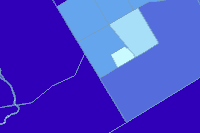

In [12]:
# Get Healthcare expenditure data
health_exp = expsearch_result[0]
health_exp

In [13]:
# Check first few layers in population Density
health_exp.layers[:5]

[<FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/0">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/1">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/2">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/3">,
 <FeatureLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/3fe029d089124e5dab518fd2c4f7eabe/rest/services/USA_Consumer_Expenditures_2018/MapServer/4">]

In [14]:
# Look at the fields and their data types
health_exp_county_layer = health_exp.layers[46]
print('FIELD NAME', '\t', 'FIELD ALIAS')
for f in health_exp_county_layer.properties.fields[:5]:
    print(f['name'], '\t',f['alias'])

FIELD NAME 	 FIELD ALIAS
OBJECTID 	 OBJECTID
Shape 	 Shape
ID 	 ID
NAME 	 NAME
STATE_NAME 	 STATE_NAME


In [15]:
# # Get specific attributes for Counties
health_exp_county_layer = health_exp.layers[46]

health_exp_county_df = pd.DataFrame()
offset = 0
while offset <= 3000:
    chunk_df = health_exp_county_layer.query(out_fields=['ST_ABBREV','NAME','X8001_A','X8002_A','X8013_A','X8018_A','X8019_A','X8024_A','X8032_A','X13002_A','X13004_A'], return_all_records=False,result_offset=offset,result_record_count=500,as_df=True)
    health_exp_county_df = pd.concat([chunk_df, health_exp_county_df], ignore_index=True)
    offset += 500

In [16]:
health_exp_county_df.shape

(3142, 13)

### Spatially Join Demographic and Health Expenditure Data
<a name="demo-health"></a>

We will spatially join both the demographic and expenditure layer so as to combine both demographic and expenditure data into a single layer.

In [17]:
# Merge demographic and health expenditure data at county level

county_healthexp_df = county_df.spatial.join(health_exp_county_df,how='left', op='within')

In [18]:
# Check geometry type
county_healthexp_df.spatial.geometry_type

['polygon']

In [19]:
# Check shape of data
county_healthexp_df.shape

(3142, 36)

In [20]:
# Write the data into a file geodatabase
county_healthexp_df.spatial.to_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_layer')

'C:\\Users\\mohi9282\\Desktop\\arcgis\\demographic_healthexp.gdb\\demographic_healthexp_layer'

This feature class can now be published as a feature service to the portal using ArcGIS Pro. The feature service can be used for any further analysis. We will publish this layer as `demographic_healthexp_layer`.

#### Check Merge Results

In [863]:
# Random check data from combined layer
county_healthexp_df[(county_healthexp_df['ST_ABBREV_left']=='NM') & (county_healthexp_df['NAME_left']=='Chaves County')]

,OBJECTID_left,ST_ABBREV_left,NAME_left,ASIAN_CY,AMERIND_CY,AVGHHSZ_CY,AVGHINC_CY,BLACK_CY,EDUCBASECY,HISPPOP_CY,MEDAGE_CY,MINORITYCY,OTHRACE_CY,PCI_CY,POPDENS_CY,UNEMPRT_CY,WHITE_CY,SMCOLL_CY,ASSCDEG_CY,BACHDEG_CY,GRADDEG_CY,SHAPE,index_right,OBJECTID_right,ST_ABBREV_right,NAME_right,X8001_A,X8002_A,X8013_A,X8018_A,X8019_A,X8024_A,X8032_A,X13002_A,X13004_A
1189,1798,NM,Chaves County,542,972,2.74,54751,1222,42002,38232,35.5,41000,16119,19980,10.9,5.2,44914,9912,3752,5830,2698,"{'rings': [[[-11571218.0164, 4039879.771099999...",1439,1798,NM,Chaves County,4034.11,2645.58,480.73,1388.53,737.0,43.09,102.35,255.81,5075.13


In [115]:
# Confirm results with County demographic data
county_df[(county_df['ST_ABBREV']=='NM') & (county_df['NAME']=='Chaves County')]

,OBJECTID,ST_ABBREV,NAME,ASIAN_CY,AMERIND_CY,AVGHHSZ_CY,AVGHINC_CY,BLACK_CY,EDUCBASECY,HISPPOP_CY,MEDAGE_CY,MINORITYCY,OTHRACE_CY,PCI_CY,POPDENS_CY,UNEMPRT_CY,WHITE_CY,SMCOLL_CY,ASSCDEG_CY,BACHDEG_CY,GRADDEG_CY,SHAPE
1189,1798,NM,Chaves County,542,972,2.74,54751,1222,42002,38232,35.5,41000,16119,19980,10.9,5.2,44914,9912,3752,5830,2698,"{'rings': [[[-11571218.0164, 4039879.771099999..."


In [116]:
# Confirm results with health expenditure data
health_exp_county_df[(health_exp_county_df['ST_ABBREV']=='NM') & (health_exp_county_df['NAME']=='Chaves County')]

,OBJECTID,ST_ABBREV,NAME,X8001_A,X8002_A,X8013_A,X8018_A,X8019_A,X8024_A,X8032_A,X13002_A,X13004_A,SHAPE
1439,1798,NM,Chaves County,4034.11,2645.58,480.73,1388.53,737.0,43.09,102.35,255.81,5075.13,"{'rings': [[[-11571218.0164, 4039879.771099999..."


### Get Provider Count - Aggregate Data

Now, we would like to get the provider count for each county. Provider count is a key variable and we can get the count in multiple ways:
    - Method 1: We can query the provider data layer, store results in a spatially enabled dataframe and generate counts.
    - Method 2: Use `AggregatePoints` tool from the GeoAnalytics Desktop Toolbox.
    
Method 1 fails due to the size and memory usage required for our data. This is where the power of GeoAnalytics Toolkit shines.

`AggregatePoints` tool helps us aggregate point data (providers) onto polygon data (counties). The output generated is a polygon layer with some aggregated statistics.

We will run `AggregatePoints` with `provider data` as our point layer and `demographic_healthexp_layer` as the polygon layer.
In simple words, this tool will grab all the providers in a particular county and give us a count of providers for that county along with other demographic and health expenditure data that was in the polygon layer for counties.

Learn more about [GeoAnalytics Desktop](https://pro.arcgis.com/en/pro-app/tool-reference/geoanalytics-desktop/aggregate-points.htm)

In [241]:
import arcpy

In [243]:
arcpy.gapro.AggregatePoints(r"C:\Users\mohi9282\Documents\ArcGIS\Projects\GWR test\npi_provider.gdb\allstates_provider",
                            r"C:\Users\mohi9282\Desktop\arcgis\aggregate_points.gdb\agg_points_NB", "POLYGON",
                            r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_layer",
                            '', None, None, None, None, None)

AttributeError: 'ToolValidator' object has no attribute 'isLicensed'

AttributeError: 'ToolValidator' object has no attribute 'isLicensed'

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\aggregate_points.gdb\\agg_points_NB'>

This aggregated data layer can now be published as a feature service to the portal and can be used for further analysis. We will publish this layer as `demo_healthexp_allproviders`.

### Get Aggregated Data Layer
<a name="merge"></a>
Get the aggrageted data layer that includes provider count and other demographics data

In [22]:
# Search for the layer
allsearch_result = gis.content.search('title: demo_healthexp_allproviders')
allsearch_result

[<Item title:"demo_healthexp_allproviders" type:Feature Layer Collection owner:portaladmin>,
 <Item title:"demo_healthexp_allproviders" type:Service Definition owner:portaladmin>]

<Item title:"demo_healthexp_allproviders" type:Feature Layer Collection owner:portaladmin>
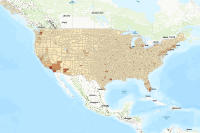

In [23]:
# Get the layer
allprovider = allsearch_result[0]
allprovider

In [24]:
allprovider.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/demo_healthexp_allproviders/FeatureServer/0">]

In [25]:
# Look at the fields in the layer
allprovider_layer = allprovider.layers[0]
for f in allprovider_layer.properties.fields:
    print(f['name'], '\t',f['alias'])

objectid1 	 OBJECTID1
objectid 	 OBJECTID
objectid_left 	 OBJECTID_left
st_abbrev_left 	 ST_ABBREV_left
name_left 	 NAME_left
asian_cy 	 ASIAN_CY
amerind_cy 	 AMERIND_CY
avghhsz_cy 	 AVGHHSZ_CY
avghinc_cy 	 AVGHINC_CY
black_cy 	 BLACK_CY
educbasecy 	 EDUCBASECY
hisppop_cy 	 HISPPOP_CY
medage_cy 	 MEDAGE_CY
minoritycy 	 MINORITYCY
othrace_cy 	 OTHRACE_CY
pci_cy 	 PCI_CY
popdens_cy 	 POPDENS_CY
unemprt_cy 	 UNEMPRT_CY
white_cy 	 WHITE_CY
smcoll_cy 	 SMCOLL_CY
asscdeg_cy 	 ASSCDEG_CY
bachdeg_cy 	 BACHDEG_CY
graddeg_cy 	 GRADDEG_CY
totpop_cy 	 TOTPOP_CY
index_right 	 index_right
objectid_right 	 OBJECTID_right
st_abbrev_right 	 ST_ABBREV_right
name_right 	 NAME_right
x8001_a 	 X8001_A
x8002_a 	 X8002_A
x8013_a 	 X8013_A
x8018_a 	 X8018_A
x8019_a 	 X8019_A
x8024_a 	 X8024_A
x8032_a 	 X8032_A
x13002_a 	 X13002_A
x13004_a 	 X13004_A
count 	 COUNT


In [26]:
# Store data from layer as a spatially enabled dataframe
allprovider_df = allprovider_layer.query(as_df=True)
allprovider_df.shape

(3139, 39)

In [27]:
allprovider_df.head()

,objectid1,objectid,objectid_left,st_abbrev_left,name_left,asian_cy,amerind_cy,avghhsz_cy,avghinc_cy,black_cy,educbasecy,hisppop_cy,medage_cy,minoritycy,othrace_cy,pci_cy,popdens_cy,unemprt_cy,white_cy,smcoll_cy,asscdeg_cy,bachdeg_cy,graddeg_cy,totpop_cy,index_right,objectid_right,st_abbrev_right,name_right,x8001_a,x8002_a,x8013_a,x8018_a,x8019_a,x8024_a,x8032_a,x13002_a,x13004_a,count,SHAPE
0,1,2089,1197,MD,Calvert County,1701,423,2.85,118378,12062,65337,3945,41.0,20664,886,41430,440.2,5.6,75625,16211,5020,10961,8931,93836,1838,1197,MD,Calvert County,7896.60,5227.44,767.21,2669.16,1497.17,83.06,157.57,592.98,11766.62,1044.0,"{'rings': [[[-76.62307999999996, 38.7672800000..."
1,2,2321,1429,MS,Issaquena County,6,3,2.40,38216,895,977,8,37.9,913,2,16066,3.4,5.2,494,199,29,50,45,1403,2070,1429,MS,Issaquena County,3310.96,2149.61,475.83,1161.34,579.97,36.65,102.27,191.88,3298.61,5.0,"{'rings': [[[-90.91433999999998, 33.0077000000..."
2,3,1509,2117,OH,Seneca County,421,168,2.47,63225,1422,38284,2977,40.0,5873,882,24981,101.8,5.5,51908,7627,4309,3811,2153,56104,758,2117,OH,Seneca County,4698.76,3081.77,547.19,1616.99,861.89,51.40,114.41,313.28,5933.05,621.0,"{'rings': [[[-82.84007999999994, 41.2553200000..."
3,4,2785,393,GA,Banks County,258,69,2.77,60360,558,13282,1307,40.4,2464,759,21821,81.6,3.1,16894,2043,855,990,574,18940,3034,393,GA,Banks County,4625.75,3042.93,557.61,1582.82,822.59,47.81,122.89,289.06,5640.16,79.0,"{'rings': [[[-83.45976999999993, 34.4811400000..."
4,5,2901,509,GA,Rockdale County,1727,307,2.81,73754,49467,60571,9491,37.8,62154,4497,26350,692.1,6.1,31300,11944,5603,11105,5462,89832,2150,509,GA,Rockdale County,5085.66,3356.61,520.50,1729.05,948.00,54.48,109.17,344.50,7113.68,1210.0,"{'rings': [[[-83.91481999999996, 33.7442000000..."


We can see that the dataframe (`allprovider_df`) has 3139 rows and 39 columns.

#### Clean Data

In [13]:
# Check for null values
allprovider_df.isnull().sum()

objectid1          0
objectid           0
objectid_left      0
st_abbrev_left     0
name_left          0
asian_cy           0
amerind_cy         0
avghhsz_cy         0
avghinc_cy         0
black_cy           0
educbasecy         0
hisppop_cy         0
medage_cy          0
minoritycy         0
othrace_cy         0
pci_cy             0
popdens_cy         0
unemprt_cy         0
white_cy           0
smcoll_cy          0
asscdeg_cy         0
bachdeg_cy         0
graddeg_cy         0
totpop_cy          0
index_right        0
objectid_right     0
st_abbrev_right    0
name_right         0
x8001_a            0
x8002_a            0
x8013_a            0
x8018_a            0
x8019_a            0
x8024_a            0
x8032_a            0
x13002_a           0
x13004_a           0
count              0
SHAPE              0
dtype: int64

In [28]:
# Check for duplicate columns
allprovider_df.columns

Index(['objectid1', 'objectid', 'objectid_left', 'st_abbrev_left', 'name_left',
       'asian_cy', 'amerind_cy', 'avghhsz_cy', 'avghinc_cy', 'black_cy',
       'educbasecy', 'hisppop_cy', 'medage_cy', 'minoritycy', 'othrace_cy',
       'pci_cy', 'popdens_cy', 'unemprt_cy', 'white_cy', 'smcoll_cy',
       'asscdeg_cy', 'bachdeg_cy', 'graddeg_cy', 'totpop_cy', 'index_right',
       'objectid_right', 'st_abbrev_right', 'name_right', 'x8001_a', 'x8002_a',
       'x8013_a', 'x8018_a', 'x8019_a', 'x8024_a', 'x8032_a', 'x13002_a',
       'x13004_a', 'count', 'SHAPE'],
      dtype='object')

We can see that the OBJECTID, ST_ABBREV AND index columns have duplicates. We will drop these duplicate columns from our data.

In [29]:
# Drop duplicate columns
allprovider_df.drop(['objectid1','objectid','index_right','objectid_right','st_abbrev_right','name_right'], axis=1, inplace=True)
allprovider_df.columns

Index(['objectid_left', 'st_abbrev_left', 'name_left', 'asian_cy',
       'amerind_cy', 'avghhsz_cy', 'avghinc_cy', 'black_cy', 'educbasecy',
       'hisppop_cy', 'medage_cy', 'minoritycy', 'othrace_cy', 'pci_cy',
       'popdens_cy', 'unemprt_cy', 'white_cy', 'smcoll_cy', 'asscdeg_cy',
       'bachdeg_cy', 'graddeg_cy', 'totpop_cy', 'x8001_a', 'x8002_a',
       'x8013_a', 'x8018_a', 'x8019_a', 'x8024_a', 'x8032_a', 'x13002_a',
       'x13004_a', 'count', 'SHAPE'],
      dtype='object')

In [30]:
# Rename Columns
allprovider_df.rename(columns={'x8001_a':'avg_healthcare','x8002_a':'avg_healthinsurance','x8013_a':'avg_medicare',
                                  'x8018_a':'avg_medicalcare','x8019_a':'avg_medicalsrvc','x8024_a':'avg_labtest',
                                  'x8032_a':'avg_presdrug','x13002_a':'avg_personalinsurance','x13004_a':'avg_socsecurity',
                                  'asian_cy':'asian_pop','amerind_cy':'amerind_pop','avghhsz_cy':'avg_hhsz',
                                  'avghinc_cy':'avg_hhinc','black_cy':'black_pop','educbasecy':'edubase',
                                  'hisppop_cy':'hisp_pop','medage_cy':'median_age','minoritycy':'minority_pop',
                                  'othrace_cy':'otherace_pop','pci_cy':'percap_income','popdens_cy':'pop_density',
                                  'unemprt_cy':'unemp_rate','white_cy':'white_pop','smcoll_cy':'some_college',
                                  'asscdeg_cy':'asso_deg','bachdeg_cy':'bach_deg','graddeg_cy':'grad_deg','totpop_cy':'total_population',
                                  'st_abbrev_left':'state','name_left':'county','count':'provider_count','objectid_left':'objectid'}, inplace=True)
allprovider_df.columns

Index(['objectid', 'state', 'county', 'asian_pop', 'amerind_pop', 'avg_hhsz',
       'avg_hhinc', 'black_pop', 'edubase', 'hisp_pop', 'median_age',
       'minority_pop', 'otherace_pop', 'percap_income', 'pop_density',
       'unemp_rate', 'white_pop', 'some_college', 'asso_deg', 'bach_deg',
       'grad_deg', 'total_population', 'avg_healthcare', 'avg_healthinsurance',
       'avg_medicare', 'avg_medicalcare', 'avg_medicalsrvc', 'avg_labtest',
       'avg_presdrug', 'avg_personalinsurance', 'avg_socsecurity',
       'provider_count', 'SHAPE'],
      dtype='object')

In [31]:
allprovider_df.shape

(3139, 33)

#### Plot Spatially Enabled Data

In [18]:
allprovider_df.spatial.plot()

MapView(layout=Layout(height='400px', width='100%'))

This map shows counties in blue that  have atleast 1 mental healthcare provider. Clicking on the map will show that merged data for that specific county.

In [247]:
# Write the data into a file geodatabase
allprovider_df.spatial.to_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders')


'C:\\Users\\mohi9282\\Desktop\\arcgis\\demographic_healthexp.gdb\\demographic_healthexp_clean_allproviders'

### Plot Data
<a name="plot"></a>

Before we plot the data, we will create a copy of `allprovider_df` and remove `objectid` and `SHAPE` columns

In [32]:
# Create copy of dataframe
test_newcounty_df = allprovider_df.copy()

In [33]:
# Drop the shape and objectid columns
test_newcounty_df.drop(['objectid','SHAPE'], axis=1, inplace=True)
test_newcounty_df.columns

Index(['state', 'county', 'asian_pop', 'amerind_pop', 'avg_hhsz', 'avg_hhinc',
       'black_pop', 'edubase', 'hisp_pop', 'median_age', 'minority_pop',
       'otherace_pop', 'percap_income', 'pop_density', 'unemp_rate',
       'white_pop', 'some_college', 'asso_deg', 'bach_deg', 'grad_deg',
       'total_population', 'avg_healthcare', 'avg_healthinsurance',
       'avg_medicare', 'avg_medicalcare', 'avg_medicalsrvc', 'avg_labtest',
       'avg_presdrug', 'avg_personalinsurance', 'avg_socsecurity',
       'provider_count'],
      dtype='object')

#### Pair Plot
We will plot each numerical variable with respect to others to see how the data is distributed and how correlated the variables are with each other.

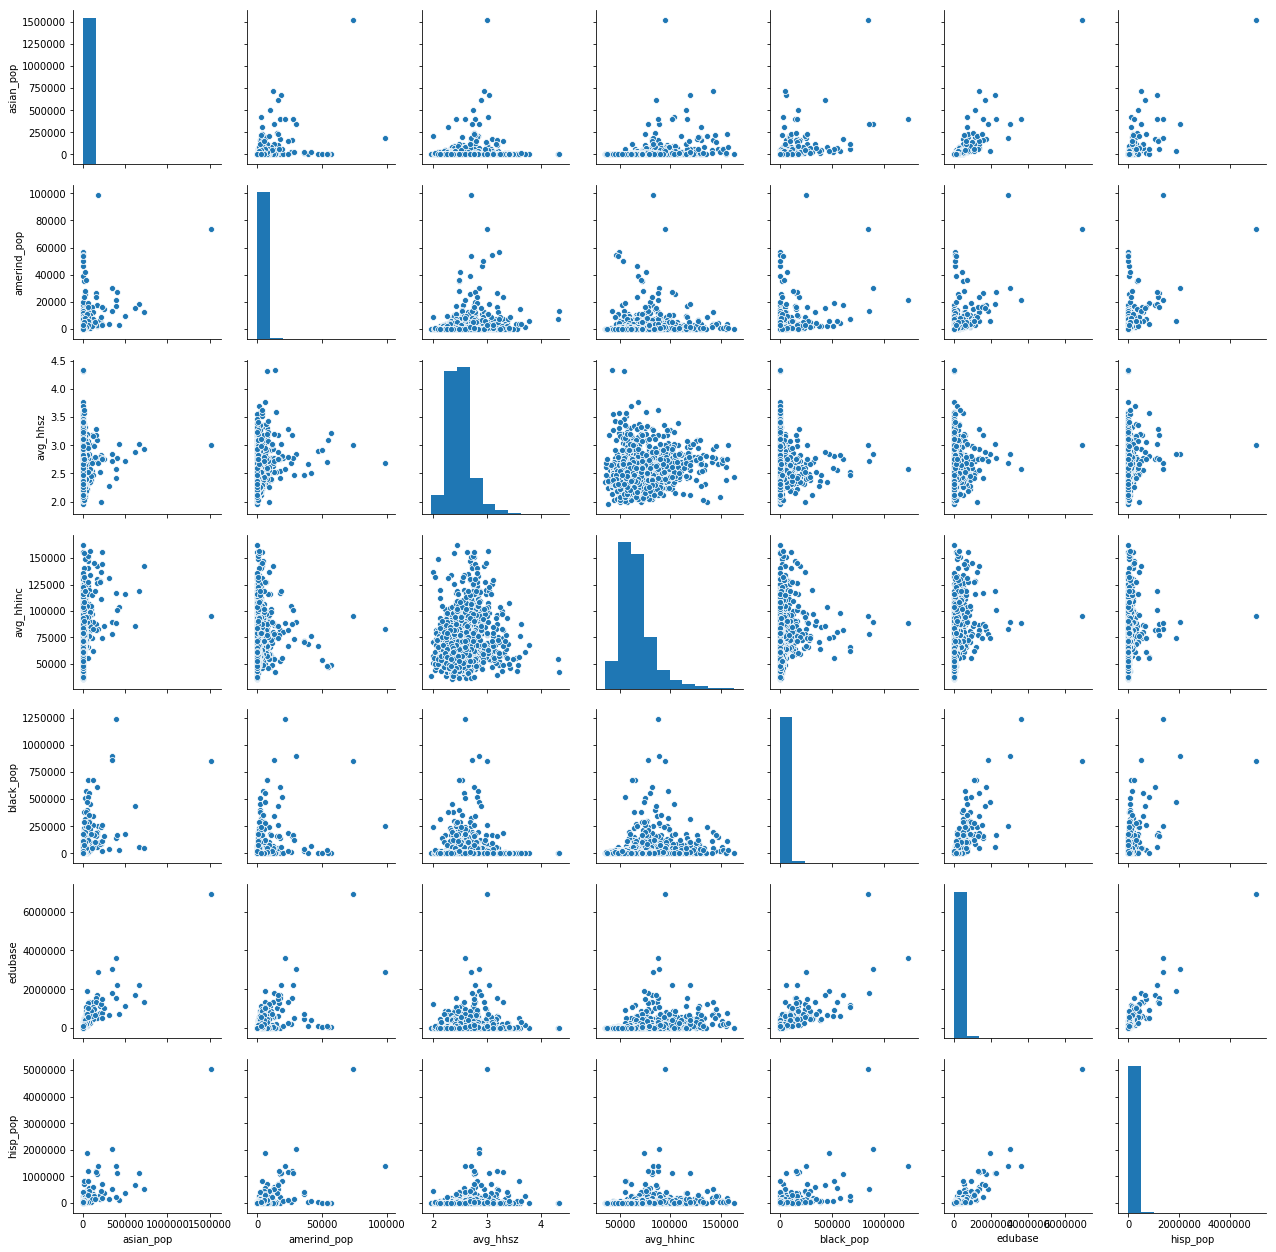

In [22]:
sns.pairplot(test_newcounty_df.iloc[:,0:9])

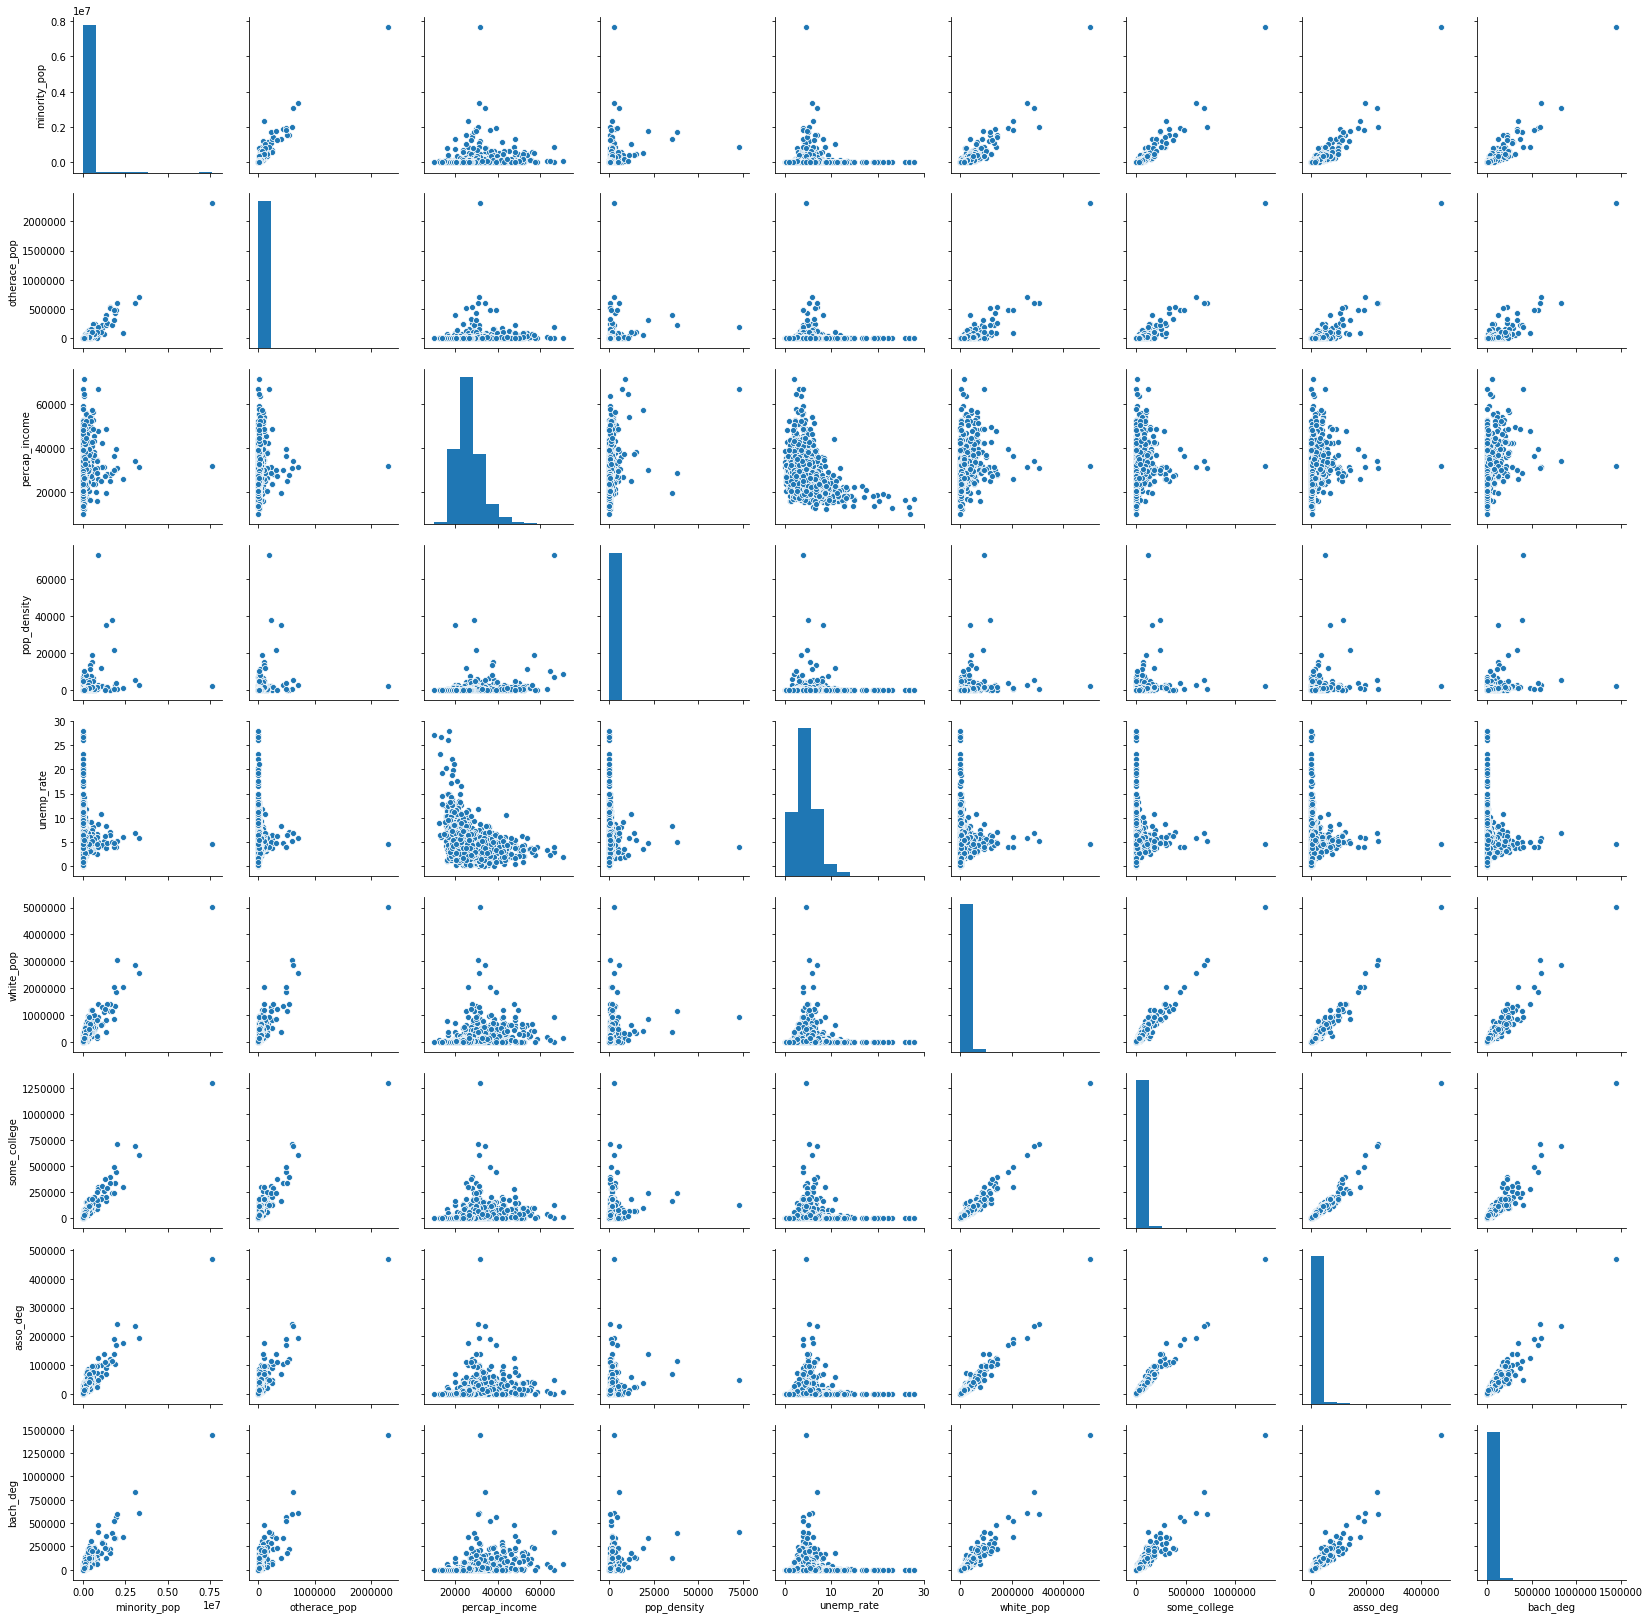

In [23]:
sns.pairplot(test_newcounty_df.iloc[:,10:19])

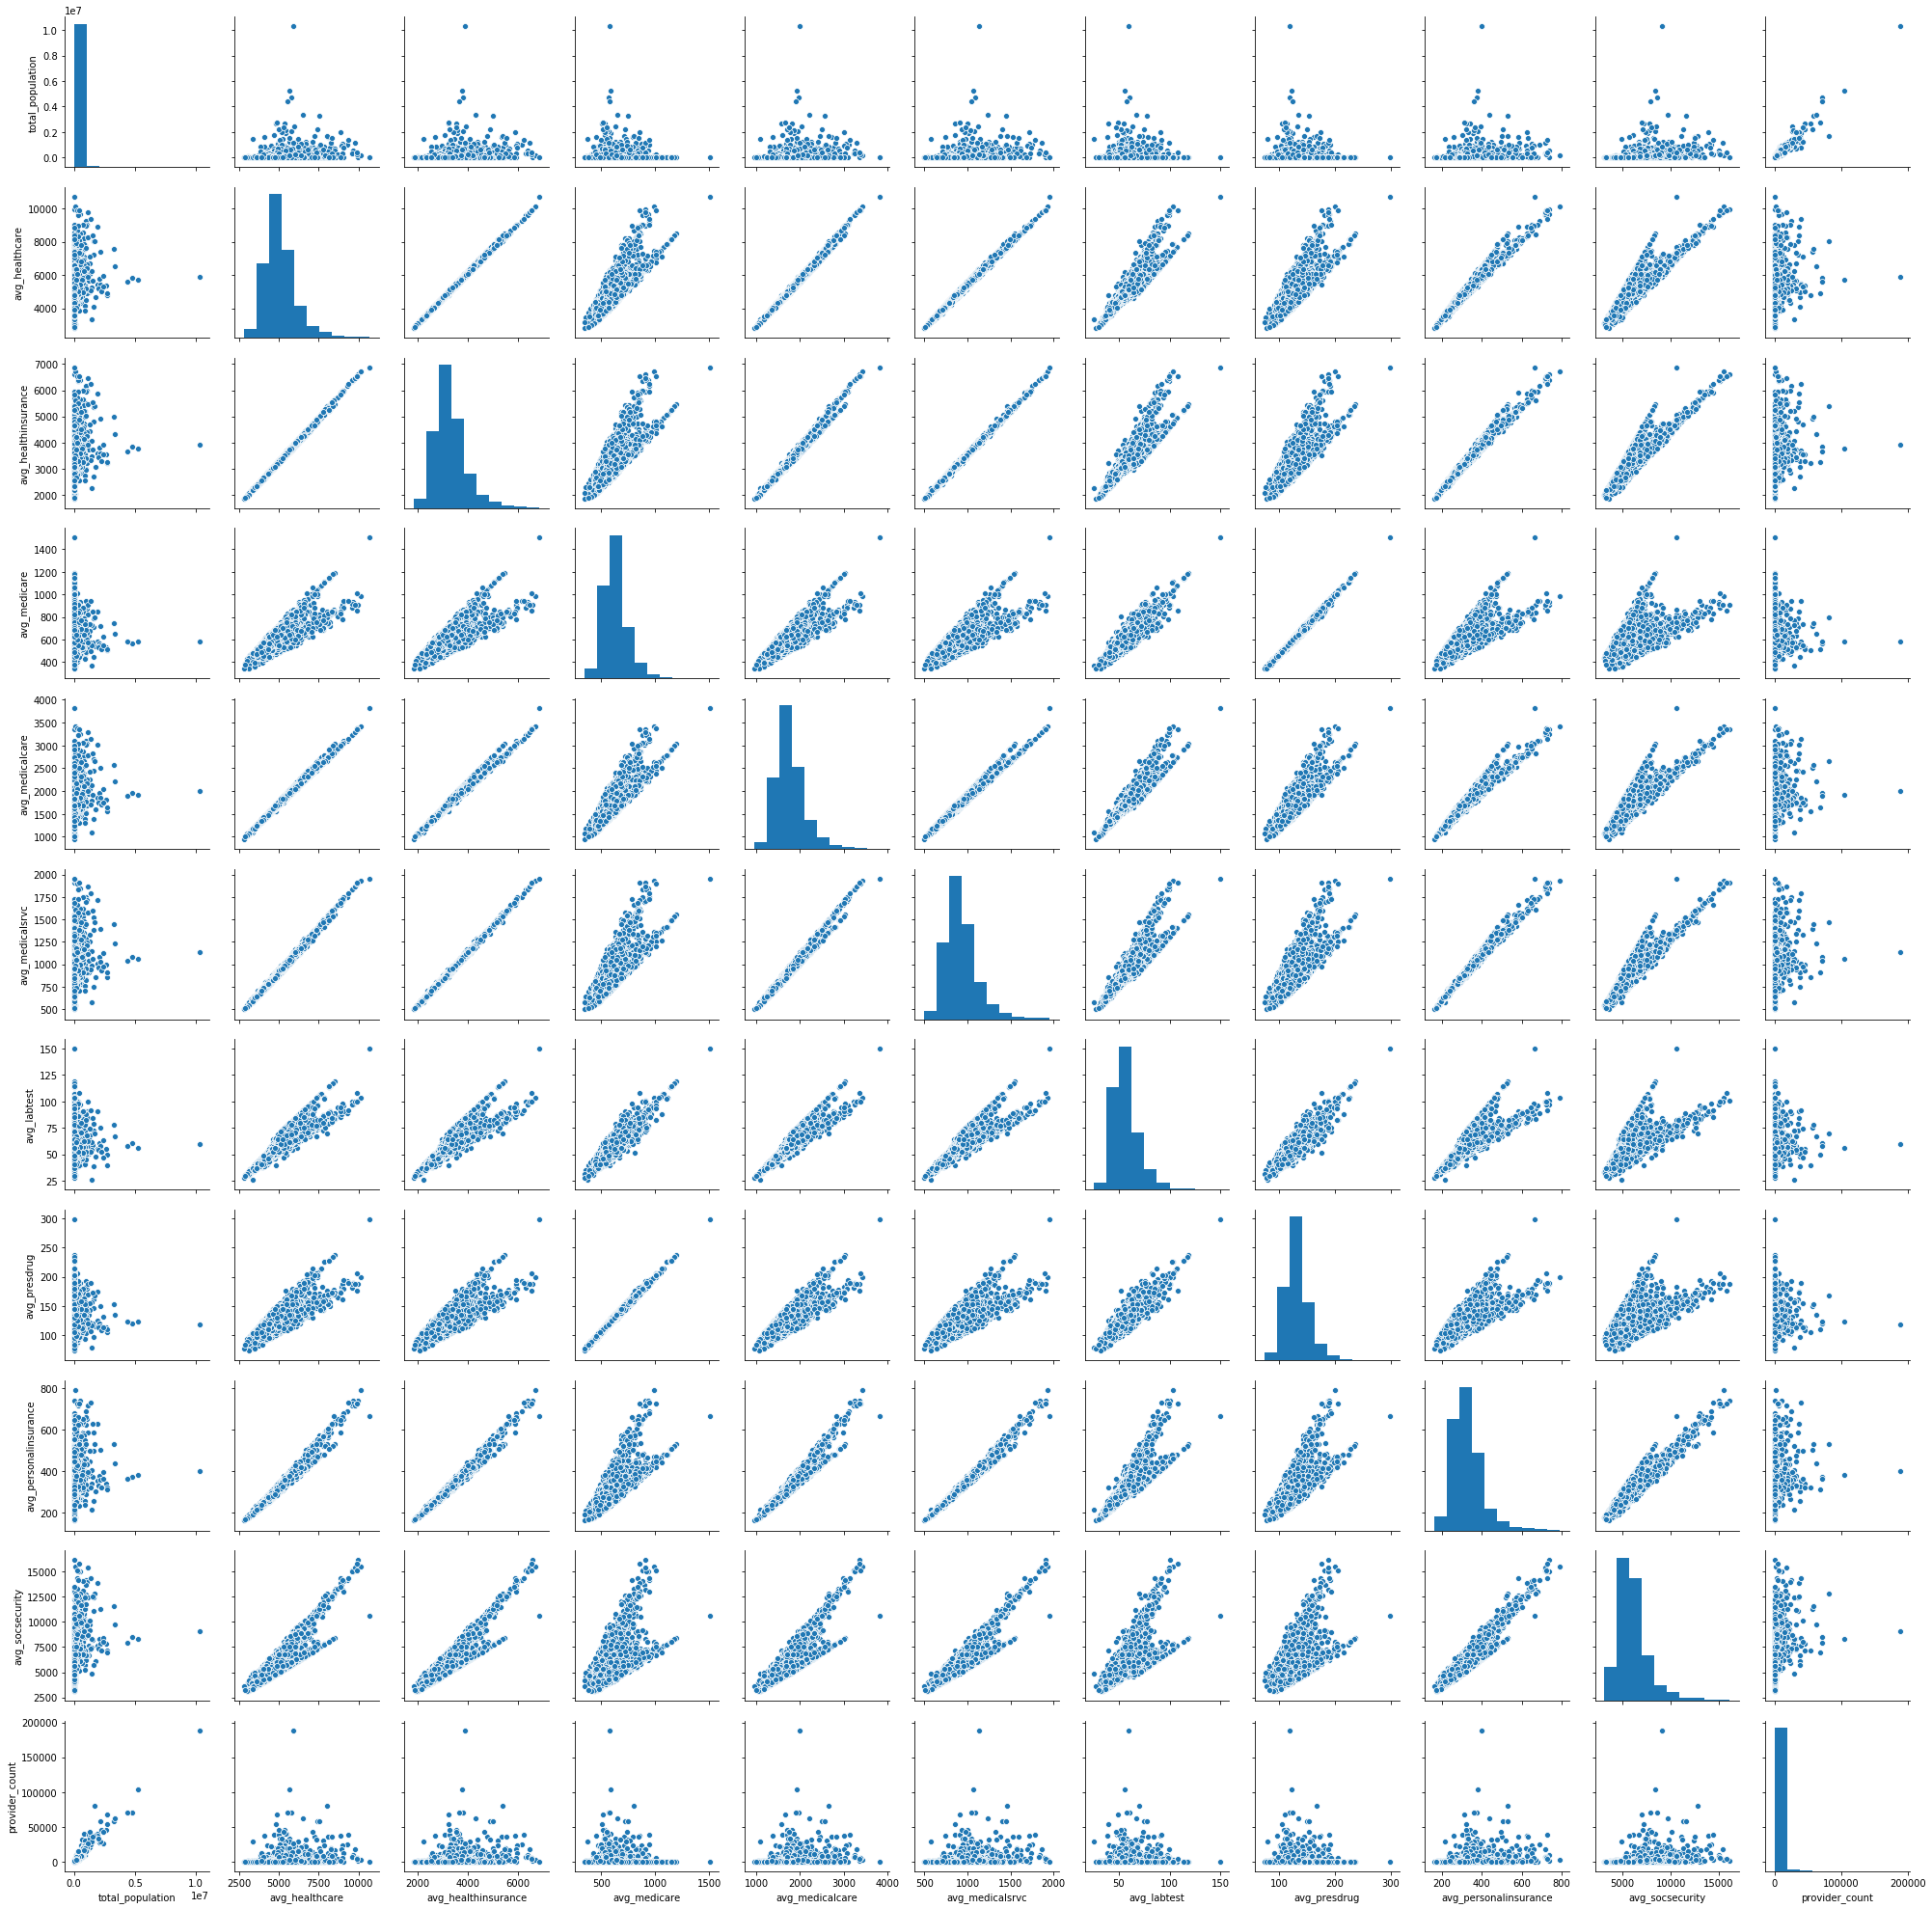

In [24]:
sns.pairplot(test_newcounty_df.iloc[:,20:])

#### Correlation Plot

Correlation plot is another great way to visualize correlation among predictor variables and correlation of predictors with response variable.

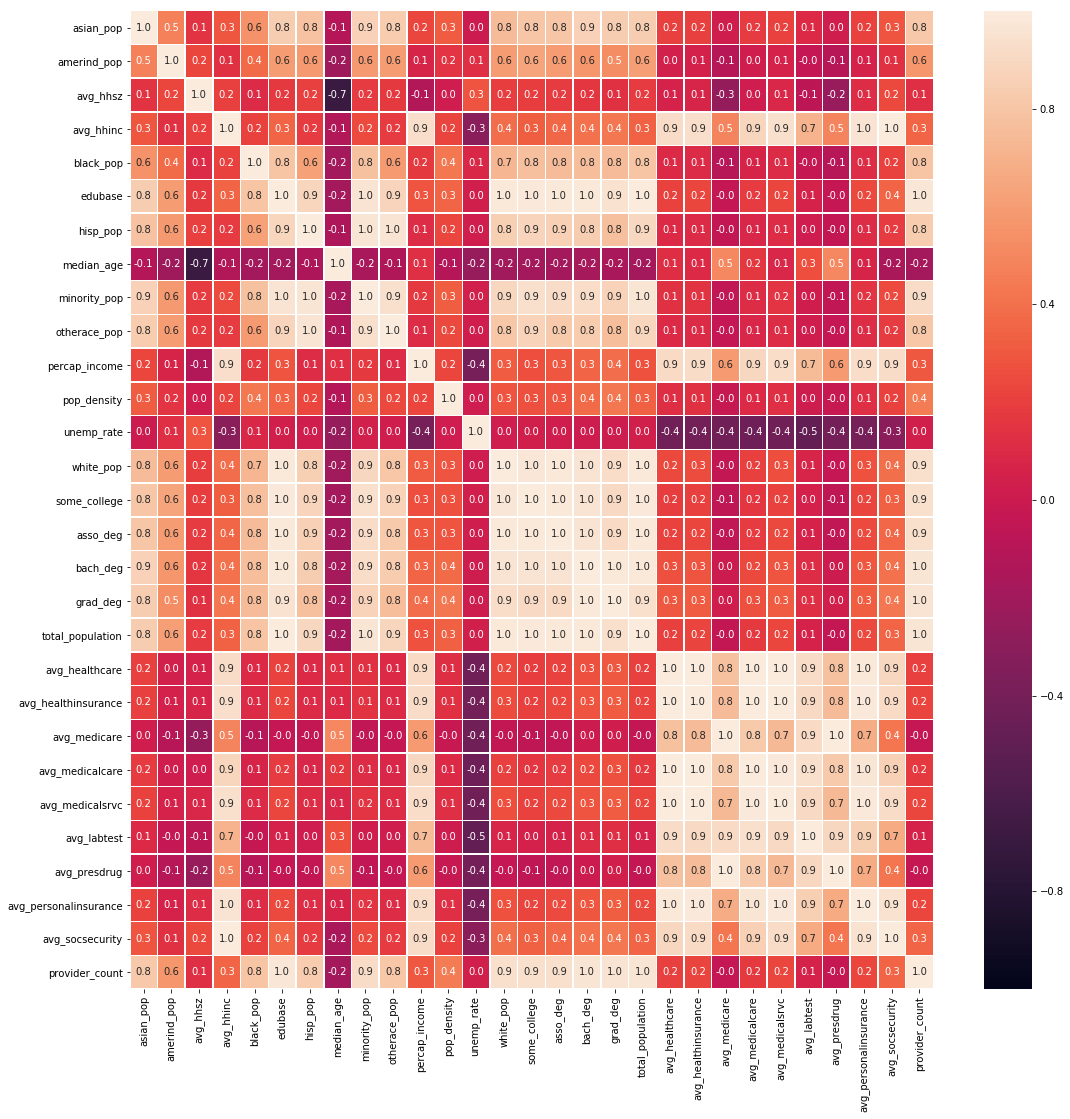

In [25]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(test_newcounty_df.corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [26]:
# Sort the values by descending order of Provider Count
test_newcounty_df = test_newcounty_df.sort_values(by=['provider_count'], ascending=False)
test_newcounty_df.head()

,state,county,asian_pop,amerind_pop,avg_hhsz,avg_hhinc,black_pop,edubase,hisp_pop,median_age,minority_pop,otherace_pop,percap_income,pop_density,unemp_rate,white_pop,some_college,asso_deg,bach_deg,grad_deg,total_population,avg_healthcare,avg_healthinsurance,avg_medicare,avg_medicalcare,avg_medicalsrvc,avg_labtest,avg_presdrug,avg_personalinsurance,avg_socsecurity,provider_count
1198,CA,Los Angeles County,1517296,73559,3.00,94861,850350,6899087,5043293,35.7,7644196,2305030,31563,2535.5,4.5,5019340,1300786,469649,1445895,782758,10288937,5905.52,3907.44,579.43,1998.08,1132.94,59.76,118.60,399.93,9046.16,188179.0
2784,IL,Cook County,395712,21113,2.58,88254,1233716,3607345,1374256,36.6,3078944,608672,34083,5579.2,6.9,2859209,690225,237028,830433,552050,5274129,5692.87,3774.06,585.60,1918.81,1061.74,56.05,122.50,381.05,8356.49,104037.0
2459,NY,New York County,212844,8756,2.00,136860,247085,1251653,441304,37.9,899778,193191,66805,72736.2,3.9,924396,121070,48360,406878,371255,1660472,8035.56,5382.10,796.17,2653.46,1464.96,69.80,167.61,530.01,12793.70,80839.0
1614,AZ,Maricopa County,184150,98584,2.69,83005,253576,2891837,1373153,35.8,1981147,598035,30701,476.9,5.3,3066684,711033,241714,597653,342159,4387226,5574.19,3675.76,581.95,1898.43,1041.69,57.84,123.67,362.02,7908.62,71069.0
1405,TX,Harris County,341640,30001,2.85,89252,901459,3029538,2035551,33.5,3339578,712410,31405,2780.1,5.9,2573473,606842,193511,605813,345886,4735852,5800.32,3840.81,564.48,1959.50,1087.37,60.64,119.69,374.86,8547.08,70953.0


## Generate a Global Model
<a name="global"></a>
The idea behind a global model is to identify various socioeconomic and demographic factors that influence access to mental healthcare providers across all counties in the United States.

To build this global model, we will follow a 3 step process:
    1. Build an Ordinary Least Squares (OLS) Regression Model and verify regressions assumptions
    2. Perform Feature Selection using Lasso, Elastic Net and Recursive Feature Elimination techniques
    3. Using selected features, build another OLS model, check performance and verify assumptions

In [34]:
# Create prdictor and response variables
train_x = test_newcounty_df.iloc[:,2:-1]
train_y = test_newcounty_df.iloc[:,-1]
train_x.head()

,asian_pop,amerind_pop,avg_hhsz,avg_hhinc,black_pop,edubase,hisp_pop,median_age,minority_pop,otherace_pop,percap_income,pop_density,unemp_rate,white_pop,some_college,asso_deg,bach_deg,grad_deg,total_population,avg_healthcare,avg_healthinsurance,avg_medicare,avg_medicalcare,avg_medicalsrvc,avg_labtest,avg_presdrug,avg_personalinsurance,avg_socsecurity
0,1701,423,2.85,118378,12062,65337,3945,41.0,20664,886,41430,440.2,5.6,75625,16211,5020,10961,8931,93836,7896.60,5227.44,767.21,2669.16,1497.17,83.06,157.57,592.98,11766.62
1,6,3,2.40,38216,895,977,8,37.9,913,2,16066,3.4,5.2,494,199,29,50,45,1403,3310.96,2149.61,475.83,1161.34,579.97,36.65,102.27,191.88,3298.61
2,421,168,2.47,63225,1422,38284,2977,40.0,5873,882,24981,101.8,5.5,51908,7627,4309,3811,2153,56104,4698.76,3081.77,547.19,1616.99,861.89,51.40,114.41,313.28,5933.05
3,258,69,2.77,60360,558,13282,1307,40.4,2464,759,21821,81.6,3.1,16894,2043,855,990,574,18940,4625.75,3042.93,557.61,1582.82,822.59,47.81,122.89,289.06,5640.16
4,1727,307,2.81,73754,49467,60571,9491,37.8,62154,4497,26350,692.1,6.1,31300,11944,5603,11105,5462,89832,5085.66,3356.61,520.50,1729.05,948.00,54.48,109.17,344.50,7113.68


In [35]:
train_y.head()

0    1044.0
1       5.0
2     621.0
3      79.0
4    1210.0
Name: provider_count, dtype: float64

### Create a Base Model
<a name="base"></a>

In [36]:
# Import libraries
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model

#### Linear Regression Model using Stats Models

In [37]:
# Create Model
X_train = train_x
X_train = sm.add_constant(X_train) # add constant
sm_ols = sm.OLS(train_y, X_train).fit() 

C:\Users\mohi9282\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
# Generate model summary
sm_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         provider_count   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3863.
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:09:43   Log-Likelihood:                -26469.
No. Observations:                3139   AIC:                         5.300e+04
Df Residuals:                    3110   BIC:                         5.317e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2632.0977    840.995      3.130      0.002     983.137    4281.059
asian_pop                -0.0838      0.006    -14.154      0.000      -0.095      -0.072
amerind_pop              -0.0445      0.009     -5.236      0.000      -0.061      -0.028
avg_hhsz               -134.0568    252.876     -0.530      0.596    -629.878     361.765
avg_hhinc                 0.2111      0.128      1.647      0.100      -0.040       0.462
black_pop                -0.0576      0.005    -12.104      0.000      -0.067      -0.048
edubase                   0.0574      0.004     16.112      0.000       0.050       0.064
hisp_pop                 -0.0880      0.012     -7.570      0.000      -0.111      -0.065
median_age              -52.1251     10.225     -5.098      0.000     -72.174     -32.076
minority_pop              0.0954      0.012      7.895      0.000       0.072       0.119
otherace_pop              0.0370      0.011      3.304      0.001       0.015       0.059
percap_income             0.1126      0.025      4.544      0.000       0.064       0.161
pop_density               0.3258      0.022     15.136      0.000       0.284       0.368
unemp_rate               -1.7981      9.948     -0.181      0.857     -21.304      17.707
white_pop                 0.0323      0.010      3.168      0.002       0.012       0.052
some_college             -0.0116      0.005     -2.309      0.021      -0.021      -0.002
asso_deg                  0.0251      0.011      2.259      0.024       0.003       0.047
bach_deg                 -0.0004      0.004     -0.091      0.928      -0.009       0.008
grad_deg                  0.0798      0.005     17.414      0.000       0.071       0.089
total_population         -0.0610      0.010     -5.978      0.000      -0.081      -0.041
avg_healthcare          468.7517   3996.627      0.117      0.907   -7367.543    8305.047
avg_healthinsurance    -463.0344   3996.586     -0.116      0.908   -8299.249    7373.180
avg_medicare              4.8259     12.003      0.402      0.688     -18.709      28.361
avg_medicalcare        -460.9320   3997.058     -0.115      0.908   -8298.073    7376.209
avg_medicalsrvc          -1.7558     14.157     -0.124      0.901     -29.513      26.002
avg_labtest            -106.1273     52.970     -2.004      0.045    -209.987      -2.267
avg_presdrug           -133.4695     64.206     -2.079      0.038    -259.360      -7.579
avg_personalinsurance     3.0744      8.394      0.366      0.714     -13.385      19.534
avg_socsecurity          -4.7149      1.430     -3.297      0.001      -7.519      -1.911
==============================================================================
Omnibus:                     1740.052   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarqu

Text(0.5, 1.0, 'Model Coefficients - Base Model')

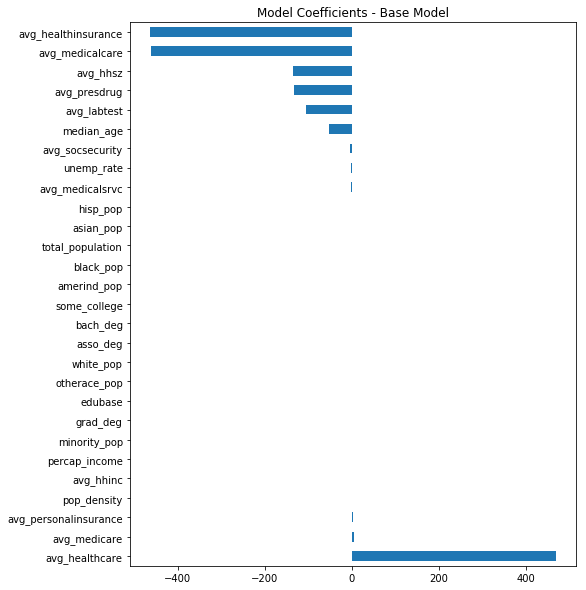

In [79]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
sm_ols.params[1:].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Coefficients - Base Model')

In [47]:
# Calculate RMSE of model
from statsmodels.tools.eval_measures import rmse
pred_val = sm_ols.fittedvalues.copy()
rmse_base_ols = rmse(train_y, pred_val)
round(rmse_base_ols,2)

1111.25

- The R-squared value of 0.972 shows that 97.2% of the variability in Provider Count is explained by the model. The R-squared value is too good to be true and the model seems to be overfitting.
 
- To identify variables that are statistically significant, we look at the p-values of individual variables. Among the coefficients, those that are statistically significant at 10% significance level are:  
    - asian_pop, amerind_pop, black_pop, edubase, hisp_pop, median_age, minority_pop, otherace_pop, percap_income, pop_density, white_pop, some_college, asso_deg, grad_deg, total_population, avg_labtest, avg_presdrug, avg_socsecurity.

- The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.

#### Verify Assumptions

In [33]:
# Get residual value
residual = sm_ols.resid

((array([-3.51389525, -3.27094889, -3.13664239, ...,  3.13664239,
          3.27094889,  3.51389525]),
  array([-11726.9785894 , -11413.4410947 ,  -9997.06188336, ...,
          10430.71487847,  12466.34880328,  17821.16595847])),
 (804.0708867886071, 1.483082775732784e-07, 0.7228437398916798))

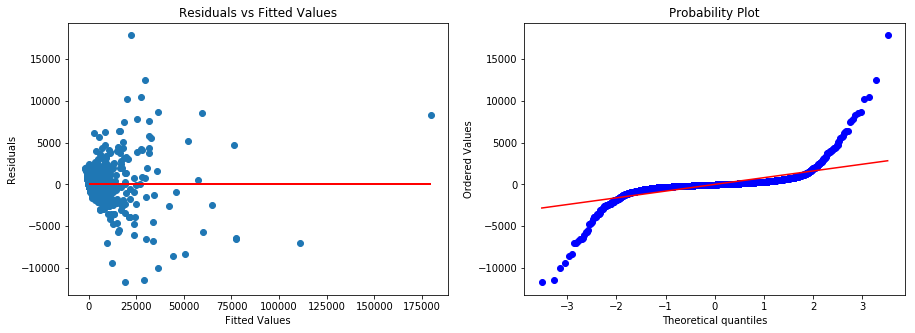

In [36]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=max(pred_val), linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted Values')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we observe a departure from constant variance as the distance of data points from zero are not consistently equal. We can see that the residuals are closer to 0 in the beggining but values start to go up as we move a little towards the right of the plot.
    - **Independence**:  We see that the data is clustered together and is not randomly distributed. This indicates a departure from independence as clusters of residuals generally indicate correlation errors, or an indication that multicollinearity exists in parts of the data.


2. Probability Plot
    - **Normality**: From this plot, we can see that the residuals have tails on both the positive and negative side. Although the residuals stay close to the zero line they are heavily tailed showing violation of Normality assumption.


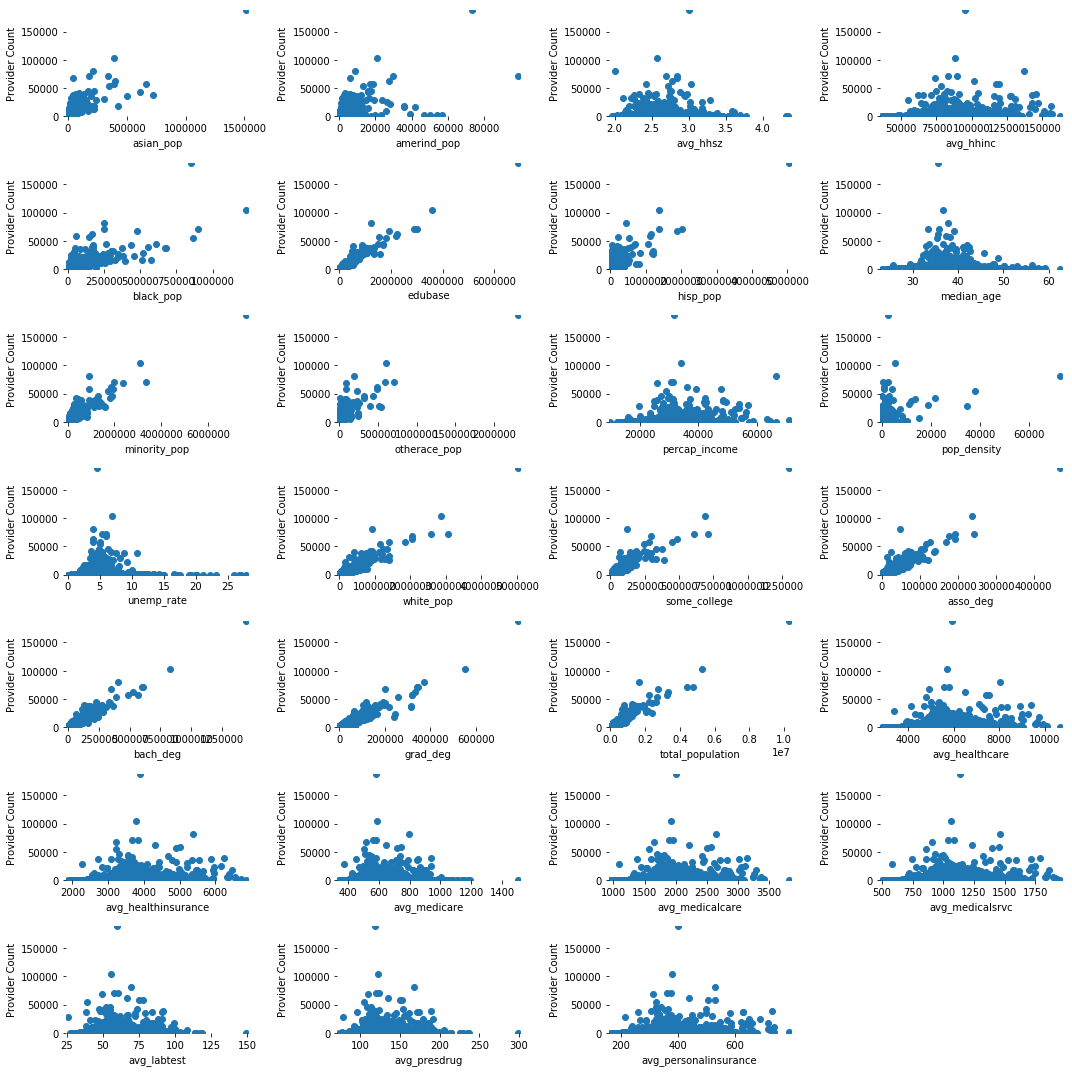

In [37]:
# Check Linearity - Plot predictors with response
states = test_newcounty_df.columns[2:-1]
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
#     provType = unique_df[unique_df['state']==states[sp]]['provider_type'].value_counts().reset_index()
#     ax.scatter(test_newcounty_df.iloc[:,2], test_newcounty_df.loc[:,states[sp]])
    ax.scatter(test_newcounty_df.loc[:,states[sp]], test_newcounty_df.iloc[:,-1])
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Predictors vs Response
     - **Linearity** - From the plot above, we can see the each predictor variable is either strongly or weakly related to response variable. From this plot, we can say that the Linearity assumption holds.

#### Outlier Detection

One way to think about whether the results we have are driven by a given data point is to calculate how far the predicted values for data would move if model was fit without the data point in question. This calculated total distance is called Cook's distance. Cook's D is a function of the leverage and standardized residual associated with each data point. The influence of each point can be visualized using an Influence Plot.

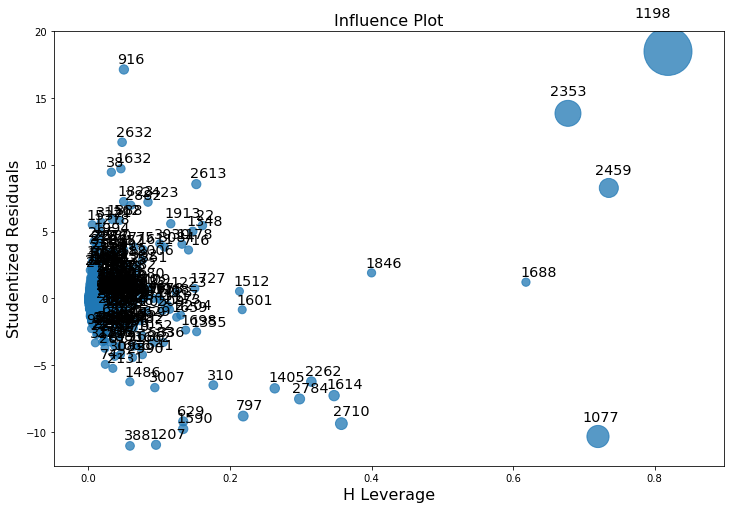

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(sm_ols, ax= ax, criterion="cooks")

From this plot, we can see that points towards the right have high leverage and higher than average residuals. The size of points like 1198, 2353 is large indicating these are influential points. Points like 916 do not have a high leverage but very high residual and are considered outliers.

#### Remove Outliers

Removing outliers is an iterative process and outliers need to be investigated before removal. Here, we followed a 4-step process to remove outliers as follows:
1. Remove initial outliers based on Influence Plot
2. Rerun the model with data after removing outliers
3. Create an influence plot to identify more outliers
4. Repeat the process above until you see satisfactory results

The outliers were removed in different iterations. Here are the obervations that were removed with each iteration:
    - Iteration 1: 198,2353,2459,1077,1688
    - Iteration 2: 2262,1614,916,2710,1846,2784,1601,1405
    - Iteration 3: 1512,1727,2204,2613,1178,2632,797,1590,1052
    - Iteration 4: 716,209,583,1348,1913,1355,310,1207,388,2423
    - Iteration 5: 1659,1698,629,2646,1632,38
    
The code below shows all outliers being removed.

In [49]:
# Remove Outliers
global_df = test_newcounty_df.copy()
# global_df.drop([2185,2754,1250,2596,2939,1222,2620,1243,2495,515,1260,3002,522,2607,429,2717,2615,2578,485,2614,2117,445,471,2938,861,2611,
#                186,2613,1140,2099,2610,2121,1174,186,2204,740,2711,2584,2587,2232,718,634,2100], axis=0, inplace=True)

global_df.drop([1198,2353,2459,1077,1688,2262,1614,916,2710,1846,2784,1601,1405,1512,1727,2204,2613,
               1178,2632,797,1590,1052,716,209,583,1348,1913,1355,310,1207,388,2423,1659,1698,629,
               2646,1632,38], axis=0, inplace=True)

In [50]:
global_df.shape

(3101, 31)

##### Re-run Model

In [51]:
# Create prdictor and response variables
train_x_rerun = global_df.iloc[:,2:-1]
train_y_rerun = global_df.iloc[:,-1]
train_x_rerun.head()

,asian_pop,amerind_pop,avg_hhsz,avg_hhinc,black_pop,edubase,hisp_pop,median_age,minority_pop,otherace_pop,percap_income,pop_density,unemp_rate,white_pop,some_college,asso_deg,bach_deg,grad_deg,total_population,avg_healthcare,avg_healthinsurance,avg_medicare,avg_medicalcare,avg_medicalsrvc,avg_labtest,avg_presdrug,avg_personalinsurance,avg_socsecurity
0,1701,423,2.85,118378,12062,65337,3945,41.0,20664,886,41430,440.2,5.6,75625,16211,5020,10961,8931,93836,7896.60,5227.44,767.21,2669.16,1497.17,83.06,157.57,592.98,11766.62
1,6,3,2.40,38216,895,977,8,37.9,913,2,16066,3.4,5.2,494,199,29,50,45,1403,3310.96,2149.61,475.83,1161.34,579.97,36.65,102.27,191.88,3298.61
2,421,168,2.47,63225,1422,38284,2977,40.0,5873,882,24981,101.8,5.5,51908,7627,4309,3811,2153,56104,4698.76,3081.77,547.19,1616.99,861.89,51.40,114.41,313.28,5933.05
3,258,69,2.77,60360,558,13282,1307,40.4,2464,759,21821,81.6,3.1,16894,2043,855,990,574,18940,4625.75,3042.93,557.61,1582.82,822.59,47.81,122.89,289.06,5640.16
4,1727,307,2.81,73754,49467,60571,9491,37.8,62154,4497,26350,692.1,6.1,31300,11944,5603,11105,5462,89832,5085.66,3356.61,520.50,1729.05,948.00,54.48,109.17,344.50,7113.68


In [52]:
# Run Model
X_train_rerun = train_x_rerun
X_train_rerun = sm.add_constant(X_train_rerun)
global_ols_rerun = sm.OLS(train_y_rerun, X_train_rerun).fit() 
residual = global_ols_rerun.resid

C:\Users\mohi9282\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


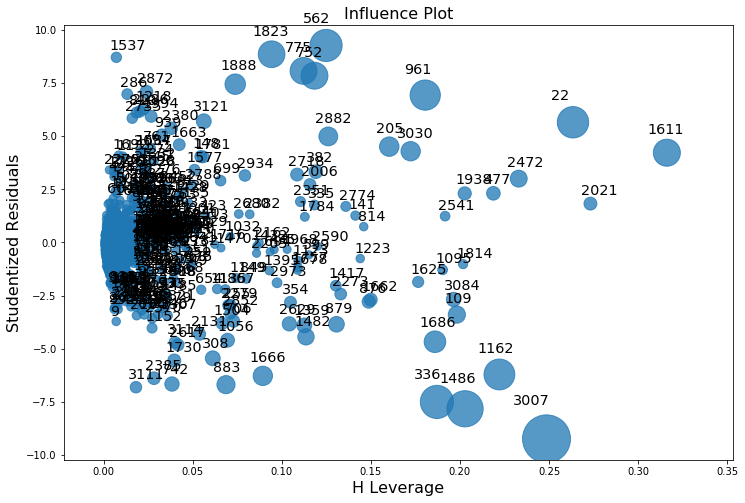

In [53]:
# Plot Outliers
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(global_ols_rerun, ax= ax, criterion="cooks")

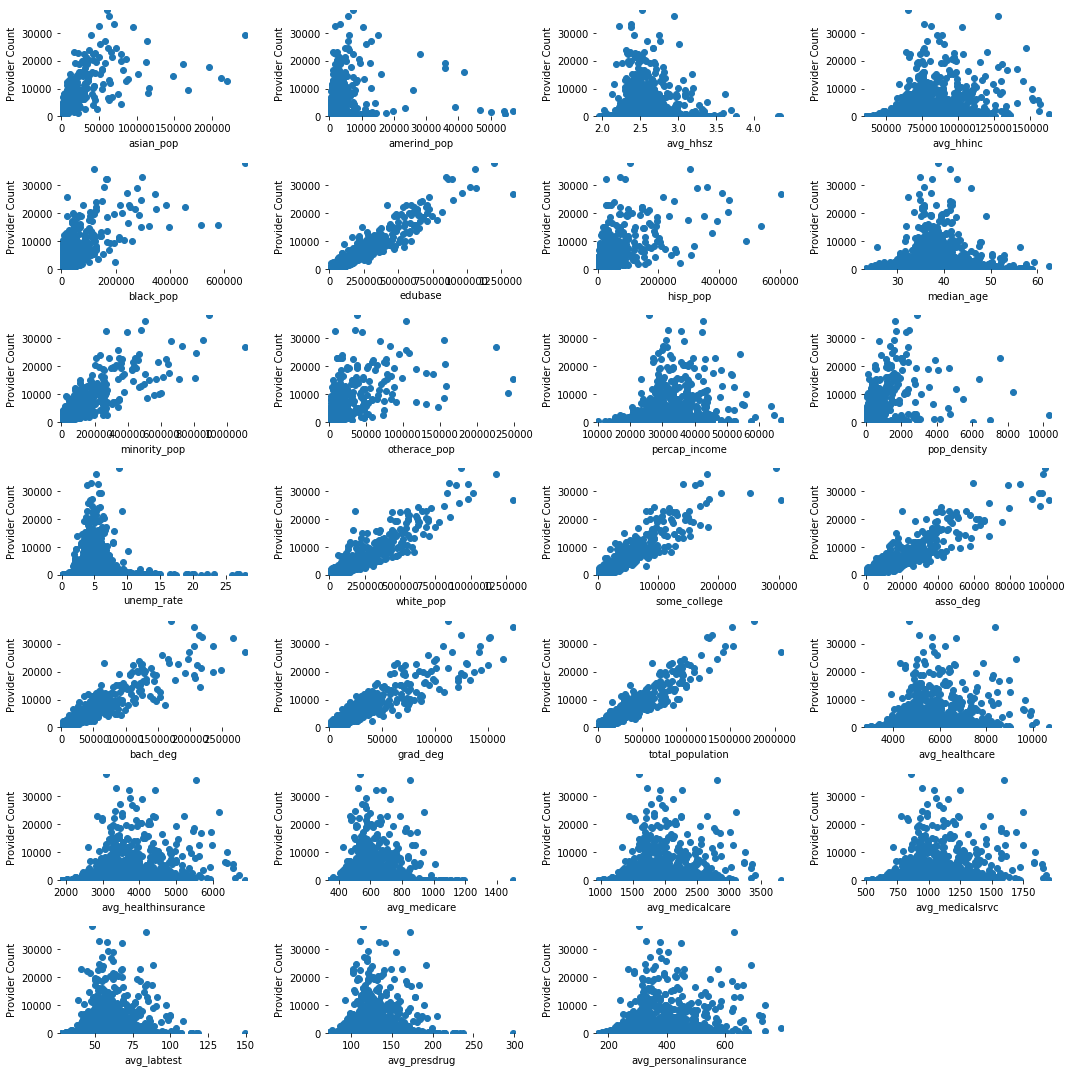

In [68]:
# Check Linearity - Plot predictors with response
states = global_df.columns[2:-1]
fig = plt.figure(figsize=(15, 15))
for sp in range(0,27):
    ax = fig.add_subplot(7,4,sp+1)
#     provType = unique_df[unique_df['state']==states[sp]]['provider_type'].value_counts().reset_index()
#     ax.scatter(test_newcounty_df.iloc[:,2], test_newcounty_df.loc[:,states[sp]])
    ax.scatter(global_df.loc[:,states[sp]], global_df.iloc[:,-1])
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Provider Count')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

### Feature Selection and Importance
<a name="feature"></a>
Our regression model results showed only few predictors that were statistically significant in predicting provider count. Feature selection is used to select those features in data that contribute most to the response variable. Having irrelevant features in the data can decrease the accuracy of many models, especially linear algorithms. To identify which predictors play a key role and remove predictors that are not statistically significant, we can use various feature selection techniques.

Greedy algorithms like Stepwise Regression and Recursive Feature Elimination (RFE) work by adding or removing attributes one at a time and building a model on those attributes that remain. RFE algorithm recursively removes attributes and uses accuracy metric to rank the feature according to their importance.

Regularization methods like Lasso and ElasticNet seek to minimize the complexity (magnitude  and  number  of  regression  coefficients) of the model by penalizing a feature given a coefficient threshold.
 - LASSO penalizes the sum of absolute value of regression coefficients thereby forcing many coefficients to 0.
 
 - ElasticNet combines the properties of both LASSO and Ridge regression.  It penalizes the model by using both the L2-norm (sum of squared values of coefficients) and the L1-norm (sum of absolute value of coefficients) thereby shrinking some coefficients closer to 0 to reduce variance and making other coefficients 0.
 
Feature importance techniques like Random Forest are used to select features using a trained supervised classifier. Random forest consists of a number of decision trees where each node in a tree is a condition on a single feature, designed to split the dataset. 

In [54]:
# Create prdictor and response variables
train_x_global = train_x_rerun
train_y_global = train_y_rerun
train_x_global.head()

,asian_pop,amerind_pop,avg_hhsz,avg_hhinc,black_pop,edubase,hisp_pop,median_age,minority_pop,otherace_pop,percap_income,pop_density,unemp_rate,white_pop,some_college,asso_deg,bach_deg,grad_deg,total_population,avg_healthcare,avg_healthinsurance,avg_medicare,avg_medicalcare,avg_medicalsrvc,avg_labtest,avg_presdrug,avg_personalinsurance,avg_socsecurity
0,1701,423,2.85,118378,12062,65337,3945,41.0,20664,886,41430,440.2,5.6,75625,16211,5020,10961,8931,93836,7896.60,5227.44,767.21,2669.16,1497.17,83.06,157.57,592.98,11766.62
1,6,3,2.40,38216,895,977,8,37.9,913,2,16066,3.4,5.2,494,199,29,50,45,1403,3310.96,2149.61,475.83,1161.34,579.97,36.65,102.27,191.88,3298.61
2,421,168,2.47,63225,1422,38284,2977,40.0,5873,882,24981,101.8,5.5,51908,7627,4309,3811,2153,56104,4698.76,3081.77,547.19,1616.99,861.89,51.40,114.41,313.28,5933.05
3,258,69,2.77,60360,558,13282,1307,40.4,2464,759,21821,81.6,3.1,16894,2043,855,990,574,18940,4625.75,3042.93,557.61,1582.82,822.59,47.81,122.89,289.06,5640.16
4,1727,307,2.81,73754,49467,60571,9491,37.8,62154,4497,26350,692.1,6.1,31300,11944,5603,11105,5462,89832,5085.66,3356.61,520.50,1729.05,948.00,54.48,109.17,344.50,7113.68


In [55]:
# Import Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### Run Feature Selection Algorithms

In [56]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

In [57]:
# Create Pipeline and Standardize the dataset
clf = LinearRegression()
pipelines = []
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso(max_iter=10000))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledRFECV', Pipeline([('Scaler', StandardScaler()),('RFECV',RFECV(estimator=clf, cv=5))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators = 100))])))

In [58]:
# Run models
import math
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, train_x_global, train_y_global, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, math.sqrt(abs(cv_results.mean())), cv_results.std())
    print(msg)
#     print("RMSE: %.3f" % (math.sqrt(abs(cv_results.mean()))))

ScaledLASSO: 752.752557 (158993.463508)
ScaledEN: 911.747735 (275002.378350)
ScaledRFECV: 749.793326 (124677.822185)
ScaledRF: 796.890772 (182829.371659)


From the results above, Lasso seems to be the most promising with lowest RMSE. Let's explore Lasso to see which variables are selected by this model.

#### Identify Features Using Lasso

In [59]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
train_x_std = sc_data.fit_transform(train_x_global)

In [60]:
# Run Lasso Model
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
lasso_model=Lasso(max_iter=10000)
lasso_model.fit(train_x_std,train_y_global)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
# Identify how many variables are picked
coef = pd.Series(lasso_model.coef_, index = train_x.columns)
print("Model picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Model picked 20 variables and eliminated the other 8 variables


In [62]:
# Get important variables and their coefficients
imp_coef = pd.concat([coef.sort_values(ascending=False).head(10),
                     coef.sort_values(ascending=False).tail(10)])
imp_coef

minority_pop        4581.381029
grad_deg            2293.551875
total_population    1555.264883
percap_income        645.684515
avg_medicare         522.336227
asso_deg             477.124062
edubase              467.544842
otherace_pop         194.044098
pop_density          116.152481
avg_hhsz              28.637549
unemp_rate           -39.235521
amerind_pop          -79.276157
some_college        -140.899712
median_age          -183.858114
avg_presdrug        -484.287719
avg_socsecurity     -906.066613
asian_pop          -1100.244169
bach_deg           -1241.042531
black_pop          -2003.848056
hisp_pop           -2534.668761
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Model')

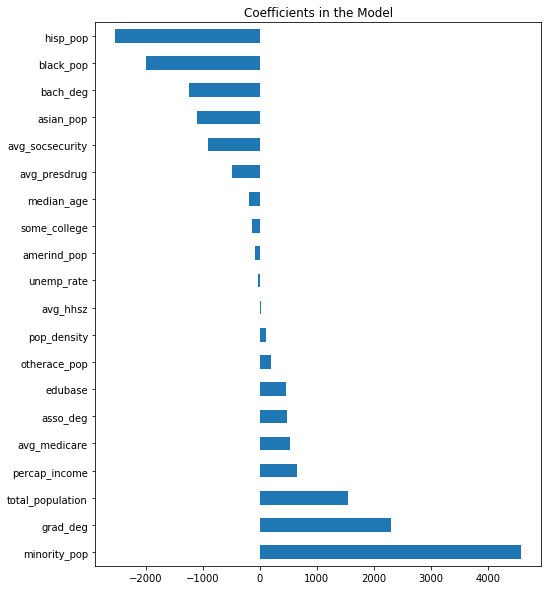

In [63]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

From the analysis above, we can see that factors that are predictive of higher provider count are:
- GRADDEG_CY (2018 Education: Graduate/Professional Degree (Esri))
- HINC15_CY (Household Income $15000 - $24999 (Esri))
- POPDENS_CY (2018 Population Density (Pop per Square Mile) (Esri))
- UNEMP_CY (2018 Unemployed Population Age 16+ (Esri))
- NHSPBLK_CY (2018 Black/African American Non-Hispanic Population (Esri))
- AGGINC_CY (2018 Aggregate Income (Esri))
- AGGHINC_CY (2018 Aggregate Household Income (Esri))
- HINC0_CY (Household Income less than $15000 (Esri))
- GQPOP_CY (2018 Group Quarters Population (Esri))
- HISPOTH_CY (2018 Hispanic Other Race Population (Esri))

Factors that negatively influence provider count are:
- HISPBLK_CY (2018 Hispanic Black/African American Population (Esri))
- NHSPOTH_CY (2018 Other Race Non-Hispanic Population (Esri))
- PIFBASE_CY (2018 Pacific Islander Female Population by Age Base (Esri))

### Regression with Selected Features
<a name="reg"></a>
In the base model, we saw deviations from linearity, constant variance and independence assumptions. The model also seemed to overfit data with an R-squared value of 0.96. 

__For Linearity__ - If a model does not fit well, it does not mean that the regression is not useful. One problem could be that the relation between one or more predictors and the response is not linear.

__For Constant Variance and Independence__ - If normality or the constant variance do not hold, then we transform the response variable. A common transformation is the power transformation of y to the lambda, also called the Box-Cox transformation.

Here we will use the features selected by lasso model, and transform both the predictor and response to create a regression model on our data.

#### Clean the Data
Some transformations such as `log` do not work well with zero or negative values. We do not have any negatives but let's check and remove any zero values from the data.

In [64]:
# Create a copy of dataframe
test_log = global_df.copy()
test_log.shape

(3101, 31)

In [65]:
# Describe to identify any zero values in dataset
test_log.describe()

,asian_pop,amerind_pop,avg_hhsz,avg_hhinc,black_pop,edubase,hisp_pop,median_age,minority_pop,otherace_pop,percap_income,pop_density,unemp_rate,white_pop,some_college,asso_deg,bach_deg,grad_deg,total_population,avg_healthcare,avg_healthinsurance,avg_medicare,avg_medicalcare,avg_medicalsrvc,avg_labtest,avg_presdrug,avg_personalinsurance,avg_socsecurity,provider_count
count,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3.101000e+03,3101.000000,3101.000000,3.101000e+03,3101.000000,3101.000000,3101.000000,3101.000000,3.101000e+03,3101.000000,3101.000000,3101.000000,3101.000000,3.101000e+03,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000,3101.000000
mean,3043.151242,864.783618,2.482086,66002.362786,10189.781683,5.552161e+04,10626.053531,41.988746,2.625575e+04,4068.765882,26313.777814,182.966978,4.614060,6.046337e+04,11695.798452,4915.803612,10485.605611,6346.259594,8.125251e+04,5074.480206,3315.863167,628.323805,1758.617036,925.907240,57.210451,131.257604,326.426227,6100.321019,1335.950661
std,13248.037233,3068.730232,0.215989,15607.249326,36295.673303,1.138470e+05,37604.683153,5.352596,7.729349e+04,14823.385839,6023.207001,545.774159,2.549695,1.143972e+05,23569.596556,9843.448716,26386.076833,16755.744154,1.679167e+05,943.178634,621.884213,110.378592,322.920403,185.229135,12.361968,21.018558,74.473635,1629.551953,3396.194362
min,0.000000,0.000000,1.960000,36078.000000,0.000000,6.900000e+01,0.000000,23.200000,4.000000e+00,0.000000,9853.000000,0.000000,0.000000,6.500000e+01,22.000000,5.000000,2.000000,0.000000,8.200000e+01,2821.510000,1871.500000,342.050000,950.010000,496.890000,27.750000,73.650000,162.690000,3121.710000,1.000000
25%,48.000000,61.000000,2.350000,55820.000000,120.000000,7.873000e+03,376.000000,38.800000,1.265000e+03,108.000000,22211.000000,16.900000,2.900000,8.891000e+03,1661.000000,645.000000,846.000000,418.000000,1.119700e+04,4436.310000,2898.900000,557.340000,1540.780000,799.940000,49.010000,117.910000,276.300000,5049.800000,87.000000
50%,160.000000,159.000000,2.460000,63394.000000,821.000000,1.831000e+04,1113.000000,41.900000,4.426000e+03,416.000000,25451.000000,45.200000,4.300000,2.134200e+04,3821.000000,1583.000000,2102.000000,1124.000000,2.603300e+04,4925.090000,3221.310000,610.370000,1704.850000,896.820000,54.780000,128.370000,315.110000,5807.610000,259.000000
75%,785.000000,515.000000,2.570000,72034.000000,5462.000000,4.616100e+04,5102.000000,45.200000,1.487400e+04,1934.000000,29223.000000,112.900000,5.800000,5.485100e+04,10023.000000,4381.000000,6404.000000,3687.000000,6.701100e+04,5557.760000,3628.930000,681.850000,1920.150000,1020.430000,63.120000,141.710000,361.800000,6708.960000,908.000000
max,244129.000000,56871.000000,4.340000,162801.000000,675982.000000,1.334604e+06,602482.000000,62.500000,1.106776e+06,248928.000000,66766.000000,10328.300000,27.900000,1.297766e+06,303602.000000,101287.000000,285839.000000,173811.000000,2.071433e+06,10690.410000,6873.420000,1501.330000,3816.990000,1955.370000,149.410000,298.340000,791.450000,16133.330000,38175.000000


We can see that the minimum for both black population and other race population is 0. Let's find out the observations with these zero values and remove them.

In [66]:
# Find observations that have 0 values
state_list = ['asian_pop','black_pop','amerind_pop','hisp_pop','otherace_pop','pop_density','unemp_rate','grad_deg']
x = test_log[(test_log[state_list] == 0).any(axis=1)]
x.shape

(50, 31)

In [67]:
test_log.shape

(3101, 31)

In [68]:
test_log.head()

,state,county,asian_pop,amerind_pop,avg_hhsz,avg_hhinc,black_pop,edubase,hisp_pop,median_age,minority_pop,otherace_pop,percap_income,pop_density,unemp_rate,white_pop,some_college,asso_deg,bach_deg,grad_deg,total_population,avg_healthcare,avg_healthinsurance,avg_medicare,avg_medicalcare,avg_medicalsrvc,avg_labtest,avg_presdrug,avg_personalinsurance,avg_socsecurity,provider_count
0,MD,Calvert County,1701,423,2.85,118378,12062,65337,3945,41.0,20664,886,41430,440.2,5.6,75625,16211,5020,10961,8931,93836,7896.60,5227.44,767.21,2669.16,1497.17,83.06,157.57,592.98,11766.62,1044.0
1,MS,Issaquena County,6,3,2.40,38216,895,977,8,37.9,913,2,16066,3.4,5.2,494,199,29,50,45,1403,3310.96,2149.61,475.83,1161.34,579.97,36.65,102.27,191.88,3298.61,5.0
2,OH,Seneca County,421,168,2.47,63225,1422,38284,2977,40.0,5873,882,24981,101.8,5.5,51908,7627,4309,3811,2153,56104,4698.76,3081.77,547.19,1616.99,861.89,51.40,114.41,313.28,5933.05,621.0
3,GA,Banks County,258,69,2.77,60360,558,13282,1307,40.4,2464,759,21821,81.6,3.1,16894,2043,855,990,574,18940,4625.75,3042.93,557.61,1582.82,822.59,47.81,122.89,289.06,5640.16,79.0
4,GA,Rockdale County,1727,307,2.81,73754,49467,60571,9491,37.8,62154,4497,26350,692.1,6.1,31300,11944,5603,11105,5462,89832,5085.66,3356.61,520.50,1729.05,948.00,54.48,109.17,344.50,7113.68,1210.0


Replace 0 values with Nan and then drop those values

In [69]:
# Replace 0 with NaN
test_log['black_pop'].replace(0.0, np.nan, inplace=True)
test_log['asian_pop'].replace(0.0, np.nan, inplace=True)
test_log['amerind_pop'].replace(0.0, np.nan, inplace=True)
test_log['hisp_pop'].replace(0.0, np.nan, inplace=True)
test_log['otherace_pop'].replace(0.0, np.nan, inplace=True)
test_log['pop_density'].replace(0.0, np.nan, inplace=True)
test_log['unemp_rate'].replace(0.0, np.nan, inplace=True)
test_log['grad_deg'].replace(0.0, np.nan, inplace=True)

# test_log[state_list] = test_log[state_list].replace({0:np.nan})
# test_log.shape
# Drop NaN
test_log.dropna(inplace=True)
test_log.shape

(3051, 31)

In [70]:
test_log.head()

,state,county,asian_pop,amerind_pop,avg_hhsz,avg_hhinc,black_pop,edubase,hisp_pop,median_age,minority_pop,otherace_pop,percap_income,pop_density,unemp_rate,white_pop,some_college,asso_deg,bach_deg,grad_deg,total_population,avg_healthcare,avg_healthinsurance,avg_medicare,avg_medicalcare,avg_medicalsrvc,avg_labtest,avg_presdrug,avg_personalinsurance,avg_socsecurity,provider_count
0,MD,Calvert County,1701.0,423.0,2.85,118378,12062.0,65337,3945.0,41.0,20664,886.0,41430,440.2,5.6,75625,16211,5020,10961,8931.0,93836,7896.60,5227.44,767.21,2669.16,1497.17,83.06,157.57,592.98,11766.62,1044.0
1,MS,Issaquena County,6.0,3.0,2.40,38216,895.0,977,8.0,37.9,913,2.0,16066,3.4,5.2,494,199,29,50,45.0,1403,3310.96,2149.61,475.83,1161.34,579.97,36.65,102.27,191.88,3298.61,5.0
2,OH,Seneca County,421.0,168.0,2.47,63225,1422.0,38284,2977.0,40.0,5873,882.0,24981,101.8,5.5,51908,7627,4309,3811,2153.0,56104,4698.76,3081.77,547.19,1616.99,861.89,51.40,114.41,313.28,5933.05,621.0
3,GA,Banks County,258.0,69.0,2.77,60360,558.0,13282,1307.0,40.4,2464,759.0,21821,81.6,3.1,16894,2043,855,990,574.0,18940,4625.75,3042.93,557.61,1582.82,822.59,47.81,122.89,289.06,5640.16,79.0
4,GA,Rockdale County,1727.0,307.0,2.81,73754,49467.0,60571,9491.0,37.8,62154,4497.0,26350,692.1,6.1,31300,11944,5603,11105,5462.0,89832,5085.66,3356.61,520.50,1729.05,948.00,54.48,109.17,344.50,7113.68,1210.0


In [71]:
test_log.describe()

,asian_pop,amerind_pop,avg_hhsz,avg_hhinc,black_pop,edubase,hisp_pop,median_age,minority_pop,otherace_pop,percap_income,pop_density,unemp_rate,white_pop,some_college,asso_deg,bach_deg,grad_deg,total_population,avg_healthcare,avg_healthinsurance,avg_medicare,avg_medicalcare,avg_medicalsrvc,avg_labtest,avg_presdrug,avg_personalinsurance,avg_socsecurity,provider_count
count,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,3092.947230,876.815143,2.485038,66020.450016,10356.214028,5.641380e+04,10797.964930,41.889708,2.668070e+04,4134.707637,26283.484431,185.927991,4.634382,6.143375e+04,11883.274664,4994.676827,10654.960341,6449.253032,8.255954e+04,5066.632448,3311.393602,626.172353,1755.238846,924.490957,56.973950,130.883910,326.086522,6104.664553,1357.639135
std,13350.425949,3091.472766,0.214153,15610.312684,36568.473041,1.145610e+05,37887.459001,5.288600,7.785250e+04,14935.359941,6005.720782,549.734794,2.525709,1.150775e+05,23716.064900,9904.334750,26568.008703,16873.036763,1.689741e+05,934.090435,616.772198,107.326660,318.869114,183.800551,12.022061,20.479074,74.255805,1631.816543,3419.653887
min,1.000000,1.000000,1.960000,36078.000000,1.000000,4.440000e+02,2.000000,23.200000,1.400000e+01,1.000000,9853.000000,0.100000,0.100000,2.050000e+02,107.000000,5.000000,38.000000,11.000000,6.230000e+02,2821.510000,1871.500000,342.050000,950.010000,496.890000,27.750000,73.650000,162.690000,3121.710000,1.000000
25%,51.000000,64.000000,2.360000,55852.500000,131.500000,8.347000e+03,392.000000,38.750000,1.346000e+03,116.000000,22177.000000,18.100000,3.000000,9.332500e+03,1737.000000,680.000000,892.000000,439.500000,1.175300e+04,4434.325000,2895.460000,556.045000,1539.220000,799.640000,48.930000,117.770000,276.060000,5053.440000,93.000000
50%,166.000000,165.000000,2.460000,63434.000000,874.000000,1.874200e+04,1167.000000,41.800000,4.592000e+03,434.000000,25428.000000,46.300000,4.300000,2.196400e+04,3908.000000,1631.000000,2170.000000,1177.000000,2.670500e+04,4919.190000,3218.300000,608.600000,1703.870000,895.550000,54.720000,128.120000,314.970000,5814.950000,272.000000
75%,806.000000,525.000000,2.570000,72082.000000,5586.500000,4.695250e+04,5234.500000,45.050000,1.521600e+04,2002.000000,29225.000000,114.850000,5.800000,5.656400e+04,10239.500000,4463.000000,6579.000000,3808.000000,6.775850e+04,5551.010000,3625.890000,679.610000,1917.820000,1018.225000,62.820000,141.385000,361.605000,6718.065000,942.500000
max,244129.000000,56871.000000,4.340000,162801.000000,675982.000000,1.334604e+06,602482.000000,62.500000,1.106776e+06,248928.000000,66766.000000,10328.300000,27.900000,1.297766e+06,303602.000000,101287.000000,285839.000000,173811.000000,2.071433e+06,10125.260000,6711.290000,1192.230000,3413.960000,1930.730000,118.650000,236.920000,791.450000,16133.330000,38175.000000


#### Transform Data

In [72]:
# Subset important predictors chosen from Lasso Model
train_x_lasso = test_log.loc[:,imp_coef.index]
train_y_lasso = test_log.iloc[:,-1]
train_x_lasso.head()

,minority_pop,grad_deg,total_population,percap_income,avg_medicare,asso_deg,edubase,otherace_pop,pop_density,avg_hhsz,unemp_rate,amerind_pop,some_college,median_age,avg_presdrug,avg_socsecurity,asian_pop,bach_deg,black_pop,hisp_pop
0,20664,8931.0,93836,41430,767.21,5020,65337,886.0,440.2,2.85,5.6,423.0,16211,41.0,157.57,11766.62,1701.0,10961,12062.0,3945.0
1,913,45.0,1403,16066,475.83,29,977,2.0,3.4,2.40,5.2,3.0,199,37.9,102.27,3298.61,6.0,50,895.0,8.0
2,5873,2153.0,56104,24981,547.19,4309,38284,882.0,101.8,2.47,5.5,168.0,7627,40.0,114.41,5933.05,421.0,3811,1422.0,2977.0
3,2464,574.0,18940,21821,557.61,855,13282,759.0,81.6,2.77,3.1,69.0,2043,40.4,122.89,5640.16,258.0,990,558.0,1307.0
4,62154,5462.0,89832,26350,520.50,5603,60571,4497.0,692.1,2.81,6.1,307.0,11944,37.8,109.17,7113.68,1727.0,11105,49467.0,9491.0


In [73]:
# Transform data
from numpy import log
sc_data = StandardScaler()
train_x_log = np.log(train_x_lasso)
train_y_log = np.log(test_log.iloc[:,-1])

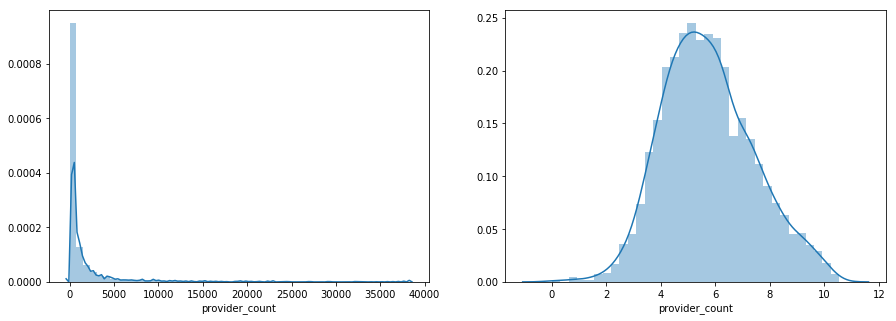

In [74]:
# Distribution of Dependent variable before and after transformation
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train_y_log, ax=ax2)
sns.distplot(train_y_lasso, ax=ax1)

From the plots above, we can see how the distribution of provider count varies before and after log transformation.

#### Run Global Model

In [75]:
X_train_log = sm.add_constant(train_x_log)
global_ols = sm.OLS(train_y_log, X_train_log).fit() 

C:\Users\mohi9282\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone1\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [76]:
global_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         provider_count   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     2798.
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:21:48   Log-Likelihood:                -1377.4
No. Observations:                3051   AIC:                             2797.
Df Residuals:                    3030   BIC:                             2923.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.9134      1.507     -2.597      0.009      -6.869      -0.958
minority_pop         0.2005      0.023      8.909      0.000       0.156       0.245
grad_deg             0.2312      0.027      8.644      0.000       0.179       0.284
total_population     0.7350      0.363      2.027      0.043       0.024       1.446
percap_income        0.8371      0.274      3.055      0.002       0.300       1.374
avg_medicare         3.8329      0.630      6.086      0.000       2.598       5.068
asso_deg             0.0806      0.027      3.005      0.003       0.028       0.133
edubase              0.0355      0.350      0.101      0.919      -0.651       0.722
otherace_pop         0.0412      0.016      2.580      0.010       0.010       0.073
pop_density         -0.0127      0.010     -1.280      0.201      -0.032       0.007
avg_hhsz            -2.1234      0.288     -7.368      0.000      -2.688      -1.558
unemp_rate           0.0070      0.016      0.427      0.669      -0.025       0.039
amerind_pop          0.0544      0.009      6.106      0.000       0.037       0.072
some_college        -0.0391      0.048     -0.819      0.413      -0.133       0.054
median_age          -0.9313      0.211     -4.420      0.000      -1.344      -0.518
avg_presdrug        -4.5444      0.659     -6.898      0.000      -5.836      -3.253
avg_socsecurity     -0.7842      0.247     -3.172      0.002      -1.269      -0.300
asian_pop            0.0640      0.012      5.433      0.000       0.041       0.087
bach_deg             0.0202      0.039      0.516      0.606      -0.057       0.097
black_pop           -0.1044      0.010    -10.091      0.000      -0.125      -0.084
hisp_pop            -0.1451      0.022     -6.538      0.000      -0.189      -0.102
==============================================================================
Omnibus:                      184.389   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              736.772
Skew:                           0.134   Prob(JB):                    1.03e-160
Kurtosis:                       5.393   Cond. No.                     7.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The Adjusted R2 of our global model is 94.9% which means that 94.6% of variation in provider count can be explained by our model.
- The p-value of F-statistic is less than 0.05 which shows that atleast one of the predicting variables has predicting power on the variability of Provider Count.
- The p-values of individual variables determine which variables are statistically significant. The equation below is the final regression equation for our model showing statistically significant variables and their coefficients. Note that both dependent and independent variables are log transformed.

$
\begin{align*}
provider\_count = 0.2005*minority\_pop + 0.2312*grad\_deg + 0.7350*total\_population + 0.8371*percap\_income \\ + 3.8329*avg\_medicare + 0.0806*asso\_deg + 0.0412*otherace\_pop + 0.0544*amerind\_pop +0.0640*asian\_pop \\ - 2.1234*avg\_hhsz - 0.9313*median\_age - 4.5444*avg\_presdrug - 0.7842*avg\_socsecurity-0.1044*black\_pop-0.1451*hisp\_pop
\end{align*}
$

Text(0.5, 1.0, 'Model Coefficients - Global Model')

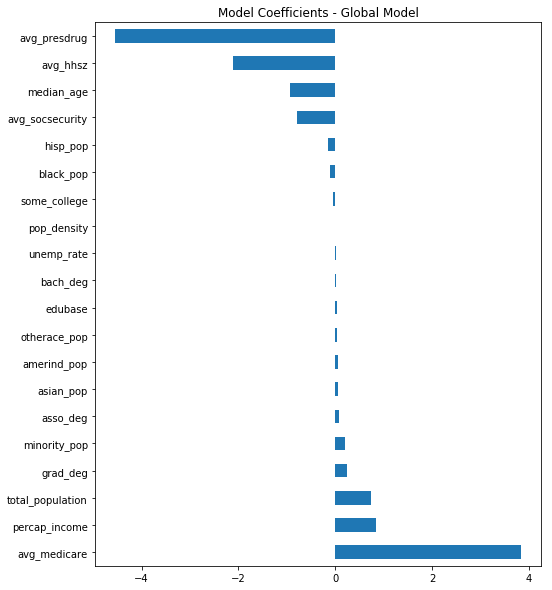

In [78]:
# Plot coefficients picked by model along with their importance
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
global_ols.params[1:].sort_values(ascending=False).plot(kind='barh')
plt.title('Model Coefficients - Global Model')

In [310]:
coef = -0.2996
((1.01**coef)-1)*100

-0.29766800002754

> __Model Interpretations:__
1. `grad_deg` - The coefficient is 0.6313. We can say that for 1% increase in graduate degree holders, Provider Count will increase by 0.63% ((1.01^coef-1)*100) holding all other predictors fixed.
2. `some_college` - The coefficient is 0.1489. We can say that for 1% increase in people with some college education, Provider Count will increase by 0.15% holding all other predictors fixed.
3. `pop_density` - The coefficient is 0.0721. We can say that for 1% increase in population density, Provider Count will increase by 0.072% holding all other predictors fixed.
4. `amerind_pop` - The coefficient is 0.1422. We can say that for 1% increase in american indian population, Provider Count will increase by 0.14% holding all other predictors fixed.
5. `asian_pop` - The coefficient is 0.2235. We can say that for 1% increase in asian population, Provider Count will increase by 0.22% holding all other predictors fixed.
6. `otherace_pop` - The coefficient is -0.1422. We can say that for 1% increase in other race population, Provider Count will decrease by 0.04% holding all other predictors fixed.
7. `black_pop` - The coefficient is -0.0418. We can say that for 1% increase in black population, Provider Count will decrease by 0.04% holding all other predictors fixed.
8. `median_age` - The coefficient is -1.3517. We can say that for 1% increase in median age, Provider Count will decrease by 1.34% holding all other predictors fixed.
9. `avg_hhsz` - The coefficient is -0.0418. We can say that for 1% increase in average household size, Provider Count will decrease by 3.06% holding all other predictors fixed.
10. `avg_socsecurity` - The coefficient is -0.0418. We can say that for 1% increase in average social security, Provider Count will decrease by 0.29% holding all other predictors fixed.

source for interpretation: https://www.cscu.cornell.edu/news/statnews/stnews83.pdf

In [234]:
# Calculate RMSE of global model
pred_val = global_ols.fittedvalues.copy()
new_rmse = rmse(train_y_log, pred_val)
new_rmse

0.3800372871729872

We can see that the rmse of our model is 0.38. Since RMSE has the same unit as the dependent variable, we can compare RMSE with the range of dependent variable to see how spread out our residuals are and see how fit our model is. A value of 0.38 on a range of 0-11 (dependent variable range) is pretty small showwing the model is a good fit.

In [82]:
# Get confidence intervals
global_ols.conf_int(alpha=0.05, cols=None)

,0,1
const,-6.868556,-0.958190
minority_pop,0.156339,0.244577
grad_deg,0.178792,0.283694
total_population,0.023936,1.446038
percap_income,0.299851,1.374267
avg_medicare,2.598019,5.067868
asso_deg,0.028011,0.133201
edubase,-0.651444,0.722358
otherace_pop,0.009894,0.072566
pop_density,-0.032128,0.006754


#### Verify Assumptions

In [236]:
# Residual Value
residual = global_ols.resid

((array([-3.50633551, -3.26289977, -3.12829611, ...,  3.12829611,
          3.26289977,  3.50633551]),
  array([-1.54196948, -1.51477397, -1.41796307, ...,  2.07337864,
          2.26249409,  2.45414794])),
 (0.37607418538756043, -8.803264389777603e-15, 0.9885455350676211))

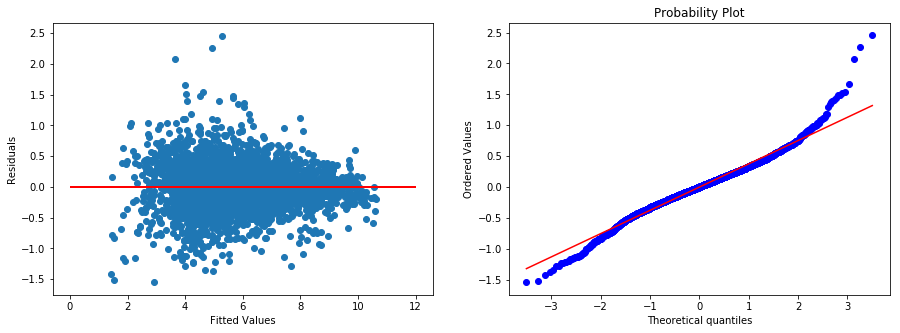

In [237]:
import scipy as sp
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Residuals vs Fitted
ax1.scatter(pred_val, residual)
ax1.hlines(y=0, xmin=0, xmax=12, linewidth=2, color='r')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')

# QQ plot
sp.stats.probplot(residual, plot=ax2, fit=True)

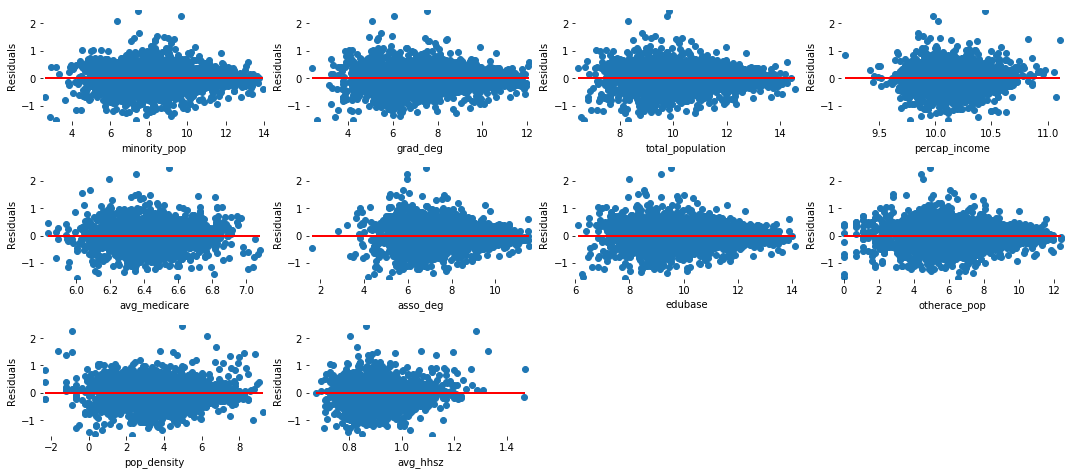

In [238]:
# Residuals vs Predictors
states = train_x_log.columns
fig = plt.figure(figsize=(15, 15))

for sp in range(0,10):
    mini = min(train_x_log.loc[:,states[sp]])
    maxi = max(train_x_log.loc[:,states[sp]])
    ax = fig.add_subplot(7,4,sp+1)
    ax.scatter(train_x_log.loc[:,states[sp]], residual)
    ax.hlines(y=0, xmin=mini, xmax=maxi, linewidth=2, color='r')
    ax.set_xlabel(states[sp])
    ax.set_ylabel('Residuals')
#     ax.set_ylim(0,provType.iloc[0,1])
    plt.xticks(rotation=0)
    for key, spine in ax.spines.items():
        spine.set_visible(False)
    ax.margins(0.01, 0)
plt.tight_layout() # automatically adjusts layout to fit long labels
plt.show()

1. Residuals vs Fitted plot
    - **Constant Variance**: From the plot, we still observe a departure from constant variance as the distance of data points from zero line is not consistent. We can see that the variation in residuals is high initially and then starts to drop.
    - **Independence**:  We see that the data is randomly distributed along the zero line indicating the independence holds.

2. Probability Plot
    - **Normality**: From this plot, we see that the residuals follow straight line with departure at the tails. Normality assumption does not hold.


3. Residuals vs Predictors Plot
    - **Linearity**: From the plot, we can see that the residuals for each predictor variable are randomly distributed accross the 0 line. We can say that the linearity assumption holds.

### GWR

In [12]:
for f in allprovider_layer.properties.fields[:5]:
    print(f['name'], '\t',f['alias'])

objectid1 	 OBJECTID1
objectid 	 OBJECTID
objectid_left 	 OBJECTID_left
st_abbrev_left 	 ST_ABBREV_left
name_left 	 NAME_left


In [13]:
from arcpy.stats import GeographicallyWeightedRegression

In [16]:
import arcpy
arcpy.stats.GWR(r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                "provider_count", "CONTINUOUS", "asian_pop;amerind_pop;avg_hhsz;black_pop;hisp_pop;median_age;minority_pop; otherace_pop;percap_income;unemp_rate;white_pop;some_college;grad_deg;avg_healthinsurance; avg_medicare;avg_labtest;avg_presdrug;avg_personalinsurance", 
                r"C:\Users\mohi9282\Desktop\arcgis\GWR_results\GWR_results.gdb\GWR_result_NB",
                "NUMBER_OF_NEIGHBORS", "USER_DEFINED", None, None, None, None, None, None, None, 50,
                None, None, None, None, "ROBUST", "GAUSSIAN", None)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\GWR_results\\GWR_results.gdb\\GWR_result_NB'>

## In Progress - Random Forest and Local Bivariate Relationships

The global model and GWR assume a linear relationship between predictors and response variable and identifies influential factors for each county at the country level. 

`What if this relationship is not linear?` `Also, how does an influential variable's impact on provider count vary accross different counties, i.e. how does graduate degree's (or other variable's) impact on provider count vary accross different counties?`

To answer these question we will explore Local Bivariate Relationships. Before we run LBR, we will run Random Forest classifier to identify important variables.

#### RF

In [17]:
from arcpy.stats import Forest

In [18]:
arcpy.stats.Forest("TRAIN", r"C:\Users\mohi9282\Desktop\arcgis\demographic_healthexp.gdb\demographic_healthexp_clean_allproviders",
                   "provider_count", None, "asian_pop false;avg_healthcare false;avg_healthinsurance false;avg_hhinc false;avg_hhsz false;avg_labtest false;avg_medicare false;avg_personalinsurance false;avg_presdrug false;black_pop false;grad_deg false;hisp_pop false;median_age false;some_college false;unemp_rate false;white_pop false",
                   None, None, None, None, None, None, None, None, None, r"C:\Users\mohi9282\Desktop\arcgis\RF_results\RF_results.gdb\RF_VImpNB_table",
                   "TRUE", 100, None, None, 100, None, 30, None, r"C:\Users\mohi9282\Desktop\arcgis\RF_results\RF_results.gdb\RF_R2NB_table",
                   None, 5, "FALSE")

<Result ''>

#### LBR

In [20]:
import arcpy
from arcpy.stats import LocalBivariateRelationships

In [22]:
# Local bivariate
arcpy.stats.LocalBivariateRelationships(r"C:\Users\mohi9282\Desktop\arcgis\mental_results\mental_results.gdb\mental_provider_df",
                                        "provider_count","grad_deg", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\mental_grad_deg_LBR_notebook",
                                        30, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)
# arcpy.stats.LocalBivariateRelationships(mental_prov_layer, "provider_count","grad_deg", r"C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\mental_grad_deg_LBR",30, 199, "CREATE_POPUP", "90%", "APPLY_FDR", 0.5)

<Result 'C:\\Users\\mohi9282\\Desktop\\arcgis\\LBR_results.gdb\\mental_grad_deg_LBR_notebook'>

#### Import from featureclass

In [23]:
import arcpy
from arcpy import da

In [24]:
test_sdf = pd.DataFrame.spatial.from_featureclass(r'C:\Users\mohi9282\Desktop\arcgis\LBR_results.gdb\mental_grad_deg_LBR_notebook')

In [25]:
test_sdf.head()

,OBJECTID,SOURCE_ID,provider_count,grad_deg,ENTROPY,PVALUES,LBR_SIG,INTERCEPT,COEF_1,PINTERCEPT,P_COEF_1,P_COEF_2,AICC,R2,P_AICc,P_R2,SIG_COEF,P_SIG_COEF,LBR_TYPE,HTML_CHART,SHAPE
0,1,1,1.0,368,0.124984,0.005,99% Confidence,-0.000327,0.928064,-0.000250,0.864750,4.298947,-327.863772,0.911681,-325.424752,0.909133,_*,_*_,Positive Linear,"<html>\n <head>\n <meta charset = ""utf-8"">...","{'rings': [[[-8966174.9526, 4783327.065399997]..."
1,2,2,11.0,1731,0.129919,0.005,99% Confidence,-0.000584,1.058333,-0.000804,1.230736,-9.229589,-318.490674,0.940869,-317.212535,0.941472,**,**_,Positive Linear,"<html>\n <head>\n <meta charset = ""utf-8"">...","{'rings': [[[-9010699.0351, 4553935.190499999]..."
2,3,3,2.0,460,0.131040,0.005,99% Confidence,-0.000438,0.941704,-0.000125,0.693667,13.226466,-335.274551,0.966096,-338.453739,0.971076,**,_**,Convex,"<html>\n <head>\n <meta charset = ""utf-8"">...","{'rings': [[[-8986636.5882, 4735386.193099998]..."
3,4,4,5.0,655,0.152220,0.005,99% Confidence,-0.000475,0.726931,0.000384,0.260843,32.751835,-281.875654,0.601909,-282.726273,0.632962,_*,__*,Positive Linear,"<html>\n <head>\n <meta charset = ""utf-8"">...","{'rings': [[[-8792002.2509, 4755765.979599997]..."
4,5,5,26.0,2274,0.172704,0.005,99% Confidence,0.000058,0.719424,0.000225,0.611760,5.880062,-265.247209,0.640415,-262.692202,0.628609,_*,_*_,Positive Linear,"<html>\n <head>\n <meta charset = ""utf-8"">...","{'rings': [[[-8945639.7857, 4611379.798600003]..."
